In [1]:
!pip install numba --upgrade
!pip install numpy --upgrade
!pip install pandas --upgrade
from data import Data
from signals import Signals
from central import Central
import backtest as bt
import pandas as pd
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
import scipy.stats as stats

Requirement already up-to-date: numba in /usr/local/lib/python3.7/dist-packages (0.53.1)
Requirement already up-to-date: numpy in /usr/local/lib/python3.7/dist-packages (1.20.2)
Requirement already up-to-date: pandas in /usr/local/lib/python3.7/dist-packages (1.2.4)


In [2]:
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (40,15)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
robot = Central()

In [5]:
robot.get_normal_data_csv('/content/drive/MyDrive/My_Project/Dados/Data_D1_3k_icmarkets.csv',drop=True,drop_list=['Unnamed: 0'])

Dados Carregados com Sucesso.


In [6]:
robot.get_normal_data()

,EURCHF_Open,EURCHF_Close,EURCHF_High,EURCHF_Low,EURGBP_Open,EURGBP_Close,EURGBP_High,EURGBP_Low,EURJPY_Open,EURJPY_Close,EURJPY_High,EURJPY_Low,EURNZD_Open,EURNZD_Close,EURNZD_High,EURNZD_Low,EURUSD_Open,EURUSD_Close,EURUSD_High,EURUSD_Low,EURAUD_Open,EURAUD_Close,EURAUD_High,EURAUD_Low,EURCAD_Open,EURCAD_Close,EURCAD_High,EURCAD_Low,GBPAUD_Open,GBPAUD_Close,GBPAUD_High,GBPAUD_Low,GBPCHF_Open,GBPCHF_Close,GBPCHF_High,GBPCHF_Low,GBPJPY_Open,GBPJPY_Close,GBPJPY_High,GBPJPY_Low,...,AUDJPY_Open,AUDJPY_Close,AUDJPY_High,AUDJPY_Low,CADJPY_Open,CADJPY_Close,CADJPY_High,CADJPY_Low,CHFJPY_Open,CHFJPY_Close,CHFJPY_High,CHFJPY_Low,NZDJPY_Open,NZDJPY_Close,NZDJPY_High,NZDJPY_Low,AUDCHF_Open,AUDCHF_Close,AUDCHF_High,AUDCHF_Low,CADCHF_Open,CADCHF_Close,CADCHF_High,CADCHF_Low,NZDCHF_Open,NZDCHF_Close,NZDCHF_High,NZDCHF_Low,AUDNZD_Open,AUDNZD_Close,AUDNZD_High,AUDNZD_Low,NZDCAD_Open,NZDCAD_Close,NZDCAD_High,NZDCAD_Low,AUDCAD_Open,AUDCAD_Close,AUDCAD_High,AUDCAD_Low
0,1.14620,1.14167,1.15173,1.13983,0.88087,0.87562,0.88222,0.87368,111.043,111.360,111.633,110.601,1.73780,1.73119,1.74354,1.72797,1.44105,1.43873,1.44738,1.43283,1.37136,1.37698,1.37924,1.37134,1.42269,1.42203,1.42403,1.42198,1.58267,1.58633,1.58740,1.58267,1.30161,1.29247,1.30504,1.29015,126.099,126.066,126.508,125.705,...,80.592,81.004,81.086,80.139,77.576,77.910,78.039,77.297,97.950,96.425,98.826,96.239,64.162,64.111,64.179,63.779,0.83386,0.83173,0.83405,0.82609,0.79866,0.80896,0.81128,0.78779,0.65333,0.66298,0.66591,0.64332,1.25741,1.25526,1.26220,1.24938,0.81814,0.81822,0.82062,0.81419,1.03273,1.03303,1.03405,1.02792
1,1.14168,1.16869,1.17343,1.13951,0.87563,0.87221,0.88072,0.86994,111.359,111.096,111.570,110.101,1.73120,1.72366,1.73586,1.71571,1.43873,1.44984,1.45008,1.43291,1.37699,1.37383,1.38259,1.37153,1.42204,1.41773,1.42316,1.41408,1.58633,1.58332,1.59020,1.57576,1.29245,1.31845,1.32362,1.28689,126.067,125.318,126.156,124.478,...,81.007,80.946,81.244,80.138,77.910,78.364,78.786,77.760,96.424,96.921,97.865,95.629,64.111,64.049,64.509,63.042,0.83172,0.83047,0.83762,0.82601,0.80897,0.80493,0.81570,0.79560,0.66298,0.65870,0.67088,0.65206,1.25528,1.26014,1.26104,1.25190,0.81822,0.82315,0.82831,0.81798,1.03302,1.03676,1.04284,1.03279
2,1.16986,1.17044,1.17108,1.16874,0.87220,0.86750,0.87428,0.86618,111.140,111.150,111.221,111.058,1.72403,1.72368,1.72641,1.72338,1.44916,1.44926,1.45021,1.44815,1.37385,1.37036,1.37730,1.36088,1.41775,1.41274,1.41920,1.40736,1.58330,1.56623,1.58485,1.56494,1.31892,1.32015,1.32066,1.31784,125.294,125.351,125.372,125.245,...,81.044,81.108,81.159,80.979,78.349,78.044,78.461,77.170,96.920,96.436,97.270,95.945,64.052,63.959,64.304,63.434,0.83047,0.85147,0.85773,0.82735,0.80495,0.80096,0.81314,0.79076,0.65874,0.65319,0.66614,0.64847,1.26037,1.26016,1.26627,1.25226,0.82444,0.82450,0.82584,0.82346,1.03768,1.03799,1.03880,1.03745
3,1.17046,1.18584,1.19403,1.16999,0.86749,0.87369,0.87440,0.86533,111.154,111.685,111.849,111.003,1.72370,1.71054,1.72574,1.70980,1.44927,1.45158,1.45482,1.44657,1.37002,1.36968,1.37131,1.36934,1.41269,1.40492,1.41497,1.40294,1.56620,1.56298,1.57686,1.56125,1.32013,1.33953,1.34953,1.32013,125.350,126.165,126.427,125.285,...,81.109,82.080,82.192,81.065,78.192,78.121,78.283,77.994,96.438,97.400,97.637,96.083,63.963,63.864,64.492,63.724,0.85296,0.85407,0.85450,0.85181,0.80098,0.79188,0.80329,0.79149,0.65325,0.64105,0.65442,0.64105,1.26017,1.26943,1.27250,1.25705,0.82450,0.82797,0.82827,0.82265,1.03800,1.04187,1.04254,1.03535
4,1.18636,1.18441,1.18961,1.17522,0.87208,0.87200,0.87255,0.87146,111.668,110.772,111.693,110.412,1.71032,1.69533,1.71032,1.68791,1.45166,1.44391,1.45328,1.43841,1.36971,1.36056,1.37094,1.35849,1.40490,1.39232,1.40622,1.38830,1.56298,1.56175,1.56968,1.55510,1.34019,1.33794,1.34395,1.32742,126.149,125.132,126.224,124.650,...,82.061,81.918,82.194,81.530,78.120,78.693,78.907,77.963,97.140,97.443,97.570,97.092,63.873,63.031,64.170,62.713,0.85406,0.87154,0.87282,0.85382,0.79634,0.79434,0.79746,0.79278,0.64632,0.644

In [7]:
robot.set_normal_data(robot.get_normal_data().iloc[500:].reset_index()) #.drop(columns=['index'])
robot.get_normal_data()

,index,EURCHF_Open,EURCHF_Close,EURCHF_High,EURCHF_Low,EURGBP_Open,EURGBP_Close,EURGBP_High,EURGBP_Low,EURJPY_Open,EURJPY_Close,EURJPY_High,EURJPY_Low,EURNZD_Open,EURNZD_Close,EURNZD_High,EURNZD_Low,EURUSD_Open,EURUSD_Close,EURUSD_High,EURUSD_Low,EURAUD_Open,EURAUD_Close,EURAUD_High,EURAUD_Low,EURCAD_Open,EURCAD_Close,EURCAD_High,EURCAD_Low,GBPAUD_Open,GBPAUD_Close,GBPAUD_High,GBPAUD_Low,GBPCHF_Open,GBPCHF_Close,GBPCHF_High,GBPCHF_Low,GBPJPY_Open,GBPJPY_Close,GBPJPY_High,...,AUDJPY_Open,AUDJPY_Close,AUDJPY_High,AUDJPY_Low,CADJPY_Open,CADJPY_Close,CADJPY_High,CADJPY_Low,CHFJPY_Open,CHFJPY_Close,CHFJPY_High,CHFJPY_Low,NZDJPY_Open,NZDJPY_Close,NZDJPY_High,NZDJPY_Low,AUDCHF_Open,AUDCHF_Close,AUDCHF_High,AUDCHF_Low,CADCHF_Open,CADCHF_Close,CADCHF_High,CADCHF_Low,NZDCHF_Open,NZDCHF_Close,NZDCHF_High,NZDCHF_Low,AUDNZD_Open,AUDNZD_Close,AUDNZD_High,AUDNZD_Low,NZDCAD_Open,NZDCAD_Close,NZDCAD_High,NZDCAD_Low,AUDCAD_Open,AUDCAD_Close,AUDCAD_High,AUDCAD_Low
0,500,1.21419,1.21539,1.21717,1.21324,0.84822,0.84457,0.84849,0.84361,119.538,124.618,124.674,119.150,1.52543,1.53599,1.53917,1.51891,1.28426,1.29330,1.29487,1.27450,1.22640,1.22787,1.22896,1.22176,1.30297,1.30908,1.31116,1.29536,1.44446,1.44650,1.44877,1.44067,1.43035,1.43086,1.43955,1.42708,140.841,146.704,146.862,...,97.337,100.496,100.570,96.966,91.718,95.113,95.200,91.416,99.803,98.913,99.942,98.509,79.004,78.681,79.384,78.022,0.99160,0.98860,0.99620,0.98731,0.92823,0.93243,0.93407,0.92787,0.79184,0.79571,0.79635,0.79102,1.24810,1.24716,1.25003,1.24637,0.85385,0.85243,0.85435,0.84874,1.06106,1.05633,1.06364,1.05327
1,501,1.21539,1.21390,1.21707,1.21291,0.84458,0.84346,0.84755,0.84150,124.615,126.780,127.282,123.857,1.53600,1.53986,1.55186,1.53322,1.29332,1.29885,1.30394,1.29002,1.22785,1.23981,1.24204,1.22323,1.30907,1.32170,1.33167,1.30752,1.44649,1.45975,1.46230,1.44305,1.43113,1.42968,1.43436,1.42327,146.706,149.514,150.039,...,100.492,101.019,101.731,99.684,95.109,95.782,96.253,93.899,98.914,99.281,99.326,98.323,78.683,79.434,79.441,78.378,0.98855,0.98015,0.99227,0.97826,0.93245,0.93825,0.93965,0.93190,0.79571,0.79828,0.79955,0.79416,1.24713,1.24396,1.24852,1.24079,0.85242,0.85662,0.85930,0.84942,1.05593,1.05412,1.06469,1.05346
2,502,1.21338,1.21347,1.21451,1.21312,0.84345,0.84293,0.84427,0.84241,127.383,127.693,128.099,127.373,1.54144,1.54318,1.54540,1.53653,1.29725,1.29920,1.30040,1.29706,1.23978,1.25216,1.25628,1.23701,1.32134,1.32253,1.32254,1.32072,1.45980,1.47592,1.47983,1.45791,1.43140,1.43035,1.43316,1.42935,150.274,150.619,151.113,...,101.764,101.902,102.170,101.719,96.396,96.633,96.875,96.302,99.290,99.091,99.297,98.836,79.434,78.972,79.464,78.468,0.98017,0.96714,0.98310,0.96637,0.93824,0.93411,0.93890,0.93173,0.79830,0.79452,0.79976,0.79269,1.24398,1.24372,1.24645,1.24218,0.85585,0.85503,0.85618,0.85466,1.05517,1.05431,1.05594,1.05381
3,503,1.21347,1.21694,1.21716,1.21295,0.84259,0.84273,0.84308,0.84223,127.692,129.478,129.505,127.403,1.54319,1.53767,1.54602,1.53563,1.29922,1.30169,1.30376,1.29681,1.25055,1.25232,1.25435,1.25040,1.32252,1.32344,1.32934,1.31888,1.47566,1.47792,1.47908,1.47566,1.43085,1.42626,1.43396,1.42328,150.534,151.819,151.860,...,101.908,103.597,103.601,101.665,96.629,97.841,97.853,96.429,99.156,99.184,99.237,99.143,78.973,78.893,79.043,78.531,0.96941,0.96809,0.96951,0.96735,0.93412,0.93255,0.93571,0.93156,0.79451,0.79490,0.79756,0.79264,1.24633,1.24429,1.24633,1.24256,0.85500,0.86014,0.86403,0.85436,1.05435,1.05854,1.06225,1.05226
4,504,1.21691,1.21987,1.22114,1.21657,0.84273,0.84328,0.84449,0.84103,129.478,129.702,130.087,128.426,1.53767,1.53436,1.54183,1.53240,1.30169,1.30804,1.31026,1.30047,1.25234,1.24969,1.25532,1.24824,1.32346,1.32918,1.33135,1.32291,1.47783,1.46526,1.48245,1.46364,1.42630,1.42841,1.43337,1.42239,151.819,151.890,152.384,...,103.594,103.990,104.342,102.829,97.839,97.538,97.996,96.987,99.185,98.415,99.316,98.221,78.906,78.818,78.961,78.547,0.96812,0.97347,0.97436,0.96642,0.93283,0.93364,0.93403,0.93243,0.79411,0.79373,0.794

In [8]:
robot.set_normal_data(robot.get_normal_data().drop(columns=['index']))
robot.get_normal_data()

,EURCHF_Open,EURCHF_Close,EURCHF_High,EURCHF_Low,EURGBP_Open,EURGBP_Close,EURGBP_High,EURGBP_Low,EURJPY_Open,EURJPY_Close,EURJPY_High,EURJPY_Low,EURNZD_Open,EURNZD_Close,EURNZD_High,EURNZD_Low,EURUSD_Open,EURUSD_Close,EURUSD_High,EURUSD_Low,EURAUD_Open,EURAUD_Close,EURAUD_High,EURAUD_Low,EURCAD_Open,EURCAD_Close,EURCAD_High,EURCAD_Low,GBPAUD_Open,GBPAUD_Close,GBPAUD_High,GBPAUD_Low,GBPCHF_Open,GBPCHF_Close,GBPCHF_High,GBPCHF_Low,GBPJPY_Open,GBPJPY_Close,GBPJPY_High,GBPJPY_Low,...,AUDJPY_Open,AUDJPY_Close,AUDJPY_High,AUDJPY_Low,CADJPY_Open,CADJPY_Close,CADJPY_High,CADJPY_Low,CHFJPY_Open,CHFJPY_Close,CHFJPY_High,CHFJPY_Low,NZDJPY_Open,NZDJPY_Close,NZDJPY_High,NZDJPY_Low,AUDCHF_Open,AUDCHF_Close,AUDCHF_High,AUDCHF_Low,CADCHF_Open,CADCHF_Close,CADCHF_High,CADCHF_Low,NZDCHF_Open,NZDCHF_Close,NZDCHF_High,NZDCHF_Low,AUDNZD_Open,AUDNZD_Close,AUDNZD_High,AUDNZD_Low,NZDCAD_Open,NZDCAD_Close,NZDCAD_High,NZDCAD_Low,AUDCAD_Open,AUDCAD_Close,AUDCAD_High,AUDCAD_Low
0,1.21419,1.21539,1.21717,1.21324,0.84822,0.84457,0.84849,0.84361,119.538,124.618,124.674,119.150,1.52543,1.53599,1.53917,1.51891,1.28426,1.29330,1.29487,1.27450,1.22640,1.22787,1.22896,1.22176,1.30297,1.30908,1.31116,1.29536,1.44446,1.44650,1.44877,1.44067,1.43035,1.43086,1.43955,1.42708,140.841,146.704,146.862,140.374,...,97.337,100.496,100.570,96.966,91.718,95.113,95.200,91.416,99.803,98.913,99.942,98.509,79.004,78.681,79.384,78.022,0.99160,0.98860,0.99620,0.98731,0.92823,0.93243,0.93407,0.92787,0.79184,0.79571,0.79635,0.79102,1.24810,1.24716,1.25003,1.24637,0.85385,0.85243,0.85435,0.84874,1.06106,1.05633,1.06364,1.05327
1,1.21539,1.21390,1.21707,1.21291,0.84458,0.84346,0.84755,0.84150,124.615,126.780,127.282,123.857,1.53600,1.53986,1.55186,1.53322,1.29332,1.29885,1.30394,1.29002,1.22785,1.23981,1.24204,1.22323,1.30907,1.32170,1.33167,1.30752,1.44649,1.45975,1.46230,1.44305,1.43113,1.42968,1.43436,1.42327,146.706,149.514,150.039,145.876,...,100.492,101.019,101.731,99.684,95.109,95.782,96.253,93.899,98.914,99.281,99.326,98.323,78.683,79.434,79.441,78.378,0.98855,0.98015,0.99227,0.97826,0.93245,0.93825,0.93965,0.93190,0.79571,0.79828,0.79955,0.79416,1.24713,1.24396,1.24852,1.24079,0.85242,0.85662,0.85930,0.84942,1.05593,1.05412,1.06469,1.05346
2,1.21338,1.21347,1.21451,1.21312,0.84345,0.84293,0.84427,0.84241,127.383,127.693,128.099,127.373,1.54144,1.54318,1.54540,1.53653,1.29725,1.29920,1.30040,1.29706,1.23978,1.25216,1.25628,1.23701,1.32134,1.32253,1.32254,1.32072,1.45980,1.47592,1.47983,1.45791,1.43140,1.43035,1.43316,1.42935,150.274,150.619,151.113,150.157,...,101.764,101.902,102.170,101.719,96.396,96.633,96.875,96.302,99.290,99.091,99.297,98.836,79.434,78.972,79.464,78.468,0.98017,0.96714,0.98310,0.96637,0.93824,0.93411,0.93890,0.93173,0.79830,0.79452,0.79976,0.79269,1.24398,1.24372,1.24645,1.24218,0.85585,0.85503,0.85618,0.85466,1.05517,1.05431,1.05594,1.05381
3,1.21347,1.21694,1.21716,1.21295,0.84259,0.84273,0.84308,0.84223,127.692,129.478,129.505,127.403,1.54319,1.53767,1.54602,1.53563,1.29922,1.30169,1.30376,1.29681,1.25055,1.25232,1.25435,1.25040,1.32252,1.32344,1.32934,1.31888,1.47566,1.47792,1.47908,1.47566,1.43085,1.42626,1.43396,1.42328,150.534,151.819,151.860,150.272,...,101.908,103.597,103.601,101.665,96.629,97.841,97.853,96.429,99.156,99.184,99.237,99.143,78.973,78.893,79.043,78.531,0.96941,0.96809,0.96951,0.96735,0.93412,0.93255,0.93571,0.93156,0.79451,0.79490,0.79756,0.79264,1.24633,1.24429,1.24633,1.24256,0.85500,0.86014,0.86403,0.85436,1.05435,1.05854,1.06225,1.05226
4,1.21691,1.21987,1.22114,1.21657,0.84273,0.84328,0.84449,0.84103,129.478,129.702,130.087,128.426,1.53767,1.53436,1.54183,1.53240,1.30169,1.30804,1.31026,1.30047,1.25234,1.24969,1.25532,1.24824,1.32346,1.32918,1.33135,1.32291,1.47783,1.46526,1.48245,1.46364,1.42630,1.42841,1.43337,1.42239,151.819,151.890,152.384,150.549,...,103.594,103.990,104.342,102.829,97.839,97.538,97.996,96.987,99.185,98.415,99.316,98.221,78.906,78.818,78.961,78.547,0.96812,0.97347,0.97436,0.96642,0.93283,0.93364,0.93403,0.93

In [9]:
robot.get_big_data_csv('/content/drive/MyDrive/My_Project/Dados/Data_M1_3_9kk_icmarkets.csv',drop=True,drop_list=['Unnamed: 0'])
robot.set_big_data(robot.get_big_data().iloc[300_000:].reset_index())
robot.set_big_data(robot.get_big_data().drop(columns=['index']))
robot.big_data_to_array()

Dados Carregados com Sucesso.


In [10]:
robot.get_big_data()

,EURUSD_Open,EURUSD_Close,EURUSD_High,EURUSD_Low,EURCHF_Open,EURCHF_Close,EURCHF_High,EURCHF_Low,EURGBP_Open,EURGBP_Close,EURGBP_High,EURGBP_Low,EURJPY_Open,EURJPY_Close,EURJPY_High,EURJPY_Low,EURNZD_Open,EURNZD_Close,EURNZD_High,EURNZD_Low,EURAUD_Open,EURAUD_Close,EURAUD_High,EURAUD_Low,EURCAD_Open,EURCAD_Close,EURCAD_High,EURCAD_Low,GBPAUD_Open,GBPAUD_Close,GBPAUD_High,GBPAUD_Low,GBPCHF_Open,GBPCHF_Close,GBPCHF_High,GBPCHF_Low,GBPJPY_Open,GBPJPY_Close,GBPJPY_High,GBPJPY_Low,...,AUDJPY_Open,AUDJPY_Close,AUDJPY_High,AUDJPY_Low,CADJPY_Open,CADJPY_Close,CADJPY_High,CADJPY_Low,CHFJPY_Open,CHFJPY_Close,CHFJPY_High,CHFJPY_Low,NZDJPY_Open,NZDJPY_Close,NZDJPY_High,NZDJPY_Low,AUDCHF_Open,AUDCHF_Close,AUDCHF_High,AUDCHF_Low,CADCHF_Open,CADCHF_Close,CADCHF_High,CADCHF_Low,NZDCHF_Open,NZDCHF_Close,NZDCHF_High,NZDCHF_Low,AUDNZD_Open,AUDNZD_Close,AUDNZD_High,AUDNZD_Low,NZDCAD_Open,NZDCAD_Close,NZDCAD_High,NZDCAD_Low,AUDCAD_Open,AUDCAD_Close,AUDCAD_High,AUDCAD_Low
0,1.41818,1.41827,1.41834,1.41817,1.21086,1.21088,1.21095,1.21085,0.87744,0.87762,0.87762,0.87744,111.507,111.504,111.523,111.503,1.65154,1.65159,1.65187,1.65140,1.30625,1.30621,1.30630,1.30614,1.35964,1.35951,1.35986,1.35947,1.53448,1.53434,1.53455,1.53430,1.33202,1.33205,1.33208,1.33190,127.152,127.169,127.174,127.151,...,85.515,85.515,85.518,85.514,82.494,82.500,82.505,82.489,96.047,95.974,96.056,95.972,67.288,67.305,67.308,67.277,0.88131,0.88070,0.88131,0.88062,0.84811,0.84825,0.84828,0.84811,0.68636,0.68629,0.68639,0.68623,1.25254,1.25277,1.25284,1.25249,0.80954,0.80934,0.80954,0.80932,1.02955,1.02948,1.02960,1.02947
1,1.41830,1.41849,1.41878,1.41826,1.21088,1.21107,1.21107,1.21088,0.87763,0.87780,0.87781,0.87762,111.503,111.452,111.503,111.445,1.65158,1.65160,1.65169,1.65157,1.30623,1.30628,1.30630,1.30589,1.35950,1.35953,1.35969,1.35937,1.53434,1.53438,1.53444,1.53420,1.33204,1.33198,1.33207,1.33193,127.169,127.171,127.180,127.162,...,85.510,85.500,85.510,85.500,82.502,82.500,82.502,82.497,95.971,95.965,95.981,95.948,67.305,67.287,67.310,67.287,0.88069,0.88096,0.88096,0.88069,0.84824,0.84824,0.84826,0.84810,0.68629,0.68627,0.68633,0.68625,1.25278,1.25273,1.25280,1.25273,0.80939,0.80946,0.80946,0.80939,1.02952,1.02951,1.02956,1.02946
2,1.41847,1.41815,1.41847,1.41805,1.21106,1.21123,1.21125,1.21103,0.87778,0.87776,0.87780,0.87770,111.451,111.476,111.482,111.448,1.65158,1.65168,1.65175,1.65153,1.30626,1.30592,1.30633,1.30573,1.35954,1.35922,1.35955,1.35890,1.53436,1.53428,1.53439,1.53417,1.33200,1.33198,1.33206,1.33192,127.171,127.169,127.180,127.168,...,85.493,85.491,85.494,85.483,82.508,82.506,82.508,82.489,95.969,95.959,95.973,95.947,67.287,67.273,67.296,67.268,0.88098,0.88080,0.88111,0.88058,0.84823,0.84857,0.84858,0.84822,0.68630,0.68631,0.68631,0.68630,1.25271,1.25284,1.25291,1.25266,0.80956,0.80943,0.80956,0.80934,1.02950,1.02955,1.02970,1.02949
3,1.41813,1.41849,1.41850,1.41805,1.21122,1.21123,1.21132,1.21120,0.87775,0.87782,0.87782,0.87773,111.474,111.470,111.477,111.461,1.65166,1.65243,1.65263,1.65151,1.30590,1.30592,1.30601,1.30578,1.35924,1.35938,1.35942,1.35914,1.53423,1.53423,1.53453,1.53411,1.33197,1.33212,1.33212,1.33190,127.165,127.168,127.172,127.149,...,85.496,85.516,85.518,85.496,82.506,82.486,82.506,82.486,95.960,95.976,95.976,95.955,67.273,67.300,67.315,67.272,0.88079,0.88082,0.88086,0.88058,0.84858,0.84847,0.84866,0.84842,0.68631,0.68632,0.68641,0.68626,1.25283,1.25303,1.25303,1.25282,0.80943,0.80937,0.80943,0.80933,1.02957,1.02985,1.02989,1.02956
4,1.41848,1.41878,1.41885,1.41836,1.21121,1.21174,1.21199,1.21119,0.87783,0.87781,0.87786,0.87781,111.469,111.490,111.490,111.469,1.65242,1.65243,1.65269,1.65239,1.30596,1.30584,1.30601,1.30581,1.35937,1.35937,1.35937,1.35937,1.53418,1.53400,1.53418,1.53387,1.33213,1.33195,1.33225,1.33195,127.163,127.173,127.176,127.161,...,85.521,85.509,85.528,85.506,82.486,82.486,82.490,82.484,95.974,95.974,95.989,95.973,67.300,67.325,67.333,67.297,0.88084,0.88100,0.88100,0.88081,0.84848,0.84851,0.84882,0.84848,0.68632,0.686

## Otimização

In [11]:
robot.pct_data(period=1)
results = pd.DataFrame()
robot.balance_signal4()

In [12]:
robot.get_normal_data().iloc[:,-56:].sum()

EURCHF_sell    647
EURCHF_buy     645
EURGBP_sell    611
EURGBP_buy     612
EURJPY_sell    615
EURJPY_buy     614
EURNZD_sell    577
EURNZD_buy     576
EURUSD_sell    613
EURUSD_buy     612
EURAUD_sell    583
EURAUD_buy     582
EURCAD_sell    576
EURCAD_buy     576
GBPAUD_sell    612
GBPAUD_buy     612
GBPCHF_sell    616
GBPCHF_buy     616
GBPJPY_sell    598
GBPJPY_buy     597
GBPCAD_sell    627
GBPCAD_buy     626
GBPUSD_sell    617
GBPUSD_buy     617
GBPNZD_sell    617
GBPNZD_buy     616
USDCHF_sell    614
USDCHF_buy     614
USDJPY_sell    595
USDJPY_buy     594
AUDUSD_sell    598
AUDUSD_buy     598
NZDUSD_sell    580
NZDUSD_buy     580
USDCAD_sell    609
USDCAD_buy     608
AUDJPY_sell    582
AUDJPY_buy     582
CADJPY_sell    579
CADJPY_buy     578
CHFJPY_sell    608
CHFJPY_buy     608
NZDJPY_sell    571
NZDJPY_buy     571
AUDCHF_sell    605
AUDCHF_buy     604
CADCHF_sell    604
CADCHF_buy     603
NZDCHF_sell    579
NZDCHF_buy     579
AUDNZD_sell    599
AUDNZD_buy     598
NZDCAD_sell 

In [13]:
%%time
count=0
for i in np.arange(0.1, 5.1, 0.1):
  for j in np.arange(0.1, 5.1, 0.1):
    a = robot.back_big_tpsl_ohl(i, j, analyse=True, multi_test=False, plot=False)
    a.rename(index={'Result':f'{i}_{j}'}, inplace=True)
    if count == 0:
      results = a.loc[f'{i}_{j}']
    else:
      results = pd.concat([results, a.loc[f'{i}_{j}']], axis=1)
    count += 1

CPU times: user 1h 8min 37s, sys: 1min 37s, total: 1h 10min 14s
Wall time: 1h 9min 46s


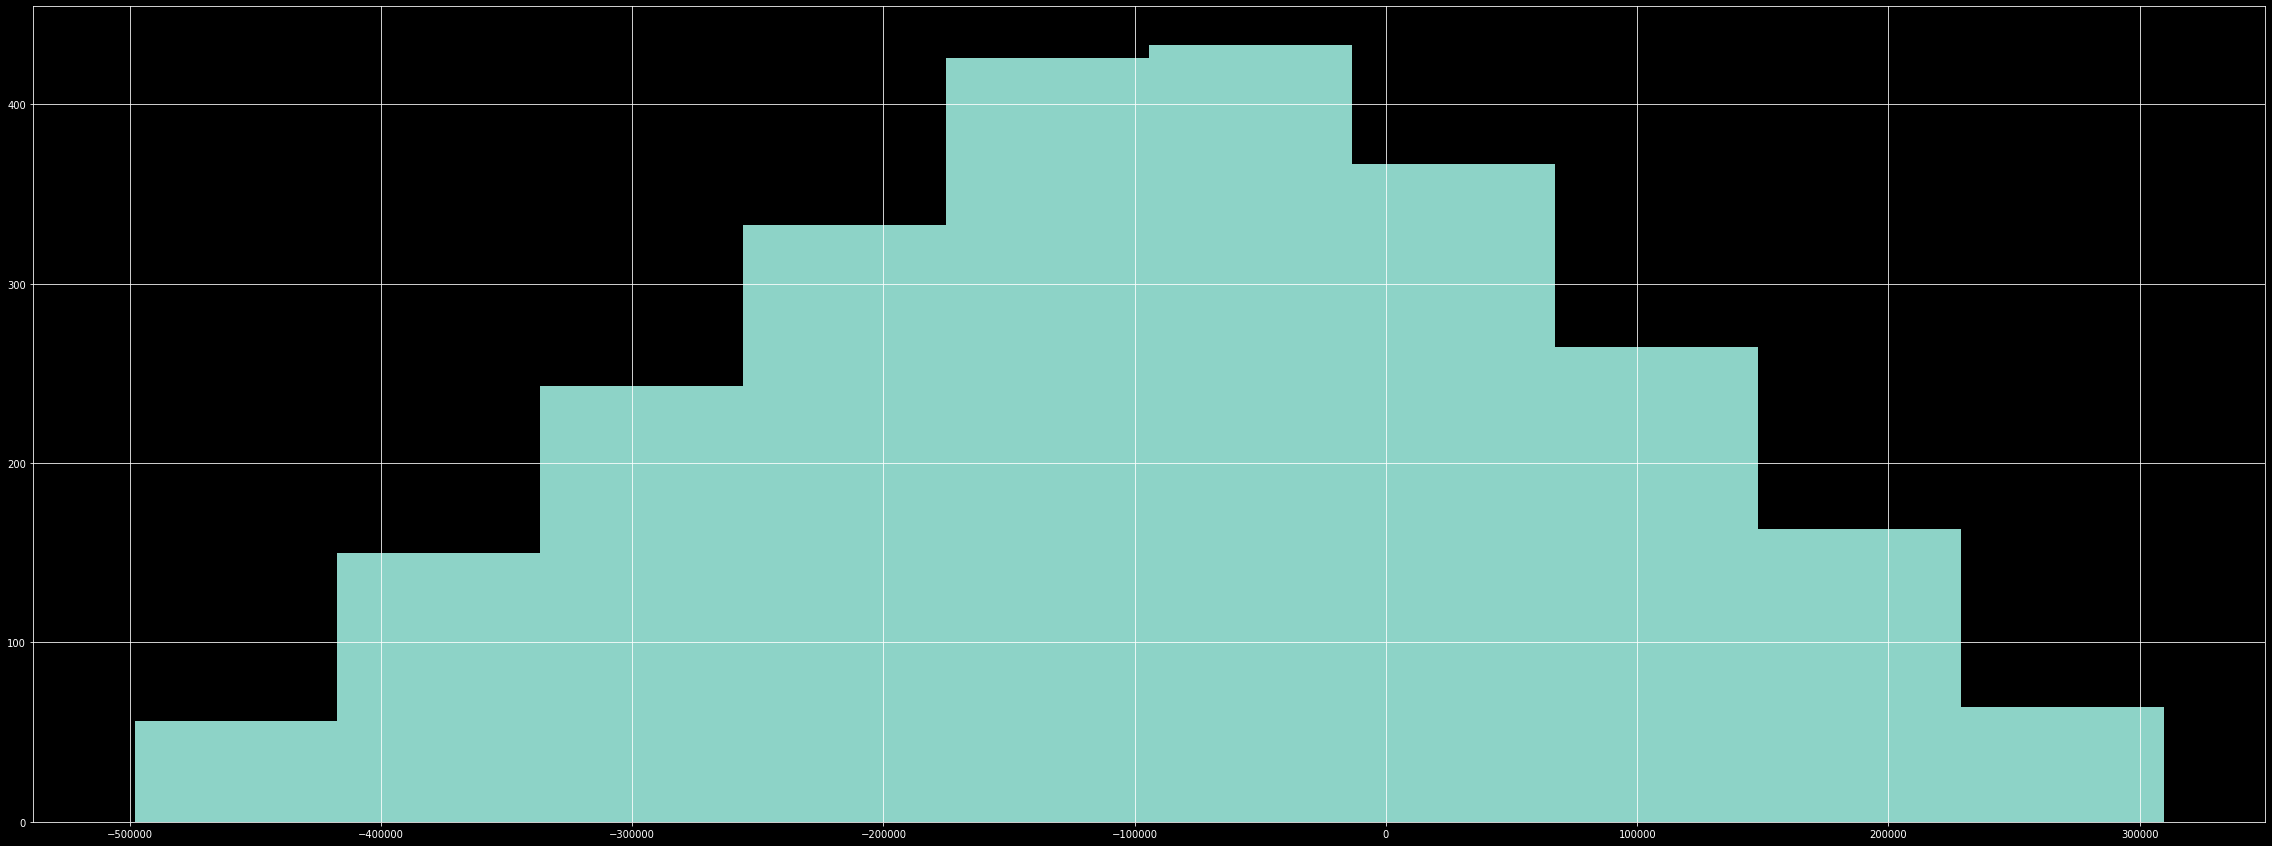

In [14]:
results.loc['Net_Profit'].hist()

In [15]:
results.to_csv('/content/drive/MyDrive/otimization2.csv',sep=',')

In [16]:
results = pd.read_csv('/content/drive/MyDrive/otimization2.csv',sep=',').set_index('Analises')
results

,0.1_0.1,0.1_0.2,0.1_0.30000000000000004,0.1_0.4,0.1_0.5,0.1_0.6,0.1_0.7000000000000001,0.1_0.8,0.1_0.9,0.1_1.0,0.1_1.1,0.1_1.2000000000000002,0.1_1.3000000000000003,0.1_1.4000000000000001,0.1_1.5000000000000002,0.1_1.6,0.1_1.7000000000000002,0.1_1.8000000000000003,0.1_1.9000000000000001,0.1_2.0,0.1_2.1,0.1_2.2,0.1_2.3000000000000003,0.1_2.4000000000000004,0.1_2.5000000000000004,0.1_2.6,0.1_2.7,0.1_2.8000000000000003,0.1_2.9000000000000004,0.1_3.0000000000000004,0.1_3.1,0.1_3.2,0.1_3.3000000000000003,0.1_3.4000000000000004,0.1_3.5000000000000004,0.1_3.6,0.1_3.7,0.1_3.8000000000000003,0.1_3.9000000000000004,0.1_4.0,...,5.0_1.1,5.0_1.2000000000000002,5.0_1.3000000000000003,5.0_1.4000000000000001,5.0_1.5000000000000002,5.0_1.6,5.0_1.7000000000000002,5.0_1.8000000000000003,5.0_1.9000000000000001,5.0_2.0,5.0_2.1,5.0_2.2,5.0_2.3000000000000003,5.0_2.4000000000000004,5.0_2.5000000000000004,5.0_2.6,5.0_2.7,5.0_2.8000000000000003,5.0_2.9000000000000004,5.0_3.0000000000000004,5.0_3.1,5.0_3.2,5.0_3.3000000000000003,5.0_3.4000000000000004,5.0_3.5000000000000004,5.0_3.6,5.0_3.7,5.0_3.8000000000000003,5.0_3.9000000000000004,5.0_4.0,5.0_4.1,5.0_4.2,5.0_4.3,5.0_4.3999999999999995,5.0_4.5,5.0_4.6,5.0_4.7,5.0_4.8,5.0_4.9,5.0_5.0
Analises,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Total_Trades,33614.000000,33614.000000,33614.000000,33613.000000,33613.000000,33611.000000,33608.000000,33599.000000,33592.000000,33578.000000,33568.000000,33560.000000,33535.000000,33525.000000,33500.000000,33476.000000,33459.000000,33444.000000,33424.000000,33390.000000,33365.000000,33319.000000,33285.000000,33228.000000,33187.000000,33155.000000,33110.000000,33057.000000,33024.000000,32984.000000,32938.000000,32884.000000,32830.000000,32774.000000,32728.000000,32676.000000,32633.000000,32604.000000,32577.000000,32534.000000,...,31370.000000,31254.000000,31116.000000,31068.000000,30997.000000,30938.000000,30873.000000,30828.000000,30800.000000,30729.000000,30692.000000,30602.000000,30580.000000,30502.000000,30446.000000,30330.000000,30290.000000,30239.000000,30190.000000,30168.000000,30060.000000,29992.000000,29951.000000,29908.000000,29749.000000,29626.000000,29550.000000,29383.000000,29527.000000,29419.000000,29400.000000,29149.000000,29091.000000,28987.000000,28973.000000,28958.000000,28857.000000,28830.000000,28831.000000,28780.000000
Average_Trades_Per_Year,92.093151,92.093151,92.093151,92.090411,92.090411,92.084932,92.076712,92.052055,92.032877,91.994521,91.967123,91.945205,91.876712,91.849315,91.780822,91.715068,91.668493,91.627397,91.572603,91.479452,91.410959,91.284932,91.191781,91.035616,90.923288,90.835616,90.712329,90.567123,90.476712,90.367123,90.241096,90.093151,89.945205,89.791781,89.665753,89.523288,89.405479,89.326027,89.252055,89.134247,...,85.945205,85.627397,85.249315,85.117808,84.923288,84.761644,84.583562,84.460274,84.383562,84.189041,84.087671,83.841096,83.780822,83.567123,83.413699,83.095890,82.986301,82.846575,82.712329,82.652055,82.356164,82.169863,82.057534,81.939726,81.504110,81.167123,80.958904,80.501370,80.895890,80.600000,80.547945,79.860274,79.701370,79.416438,79.378082,79.336986,79.060274,78.986301,78.989041,78.849315
Annualized_Return_%,-22.306029,-35.634301,-42.476695,-47.172115,-50.775326,-53.714411,-56.199275,-58.340126,-60.241823,-61.939834,-63.463709,-64.865397,-66.129290,-67.325101,-68.411775,-69.419491,-70.378048,-71.276443,-72.125360,-72.927626,-73.706516,-74.411681,-75.081526,-75.705284,-76.328206,-76.917143,-77.479602,-78.017700,-78.555900,-79.064623,-79.541128,-79.993188,-80.431238,-80.836816,-81.231775,-81.599705,-81.989306,-82.391797,-82.772231,-83.123896,...,70.033563,69.107251,68.321158,67.404699,66.514434,65.593400,64.639617,63.497360,62.370059,61.277690,60.014208,58.859112,57.800871,56.340749,54.669828,53.033782,51.102976,49.211071,47.115765,44.796993,41.460541,37.507476,33.237118,26.832212,19.077642,-19.908340,-29.477589,-34.787021,-36.880770,-40.548440,-43.053698,-46.168012,-48

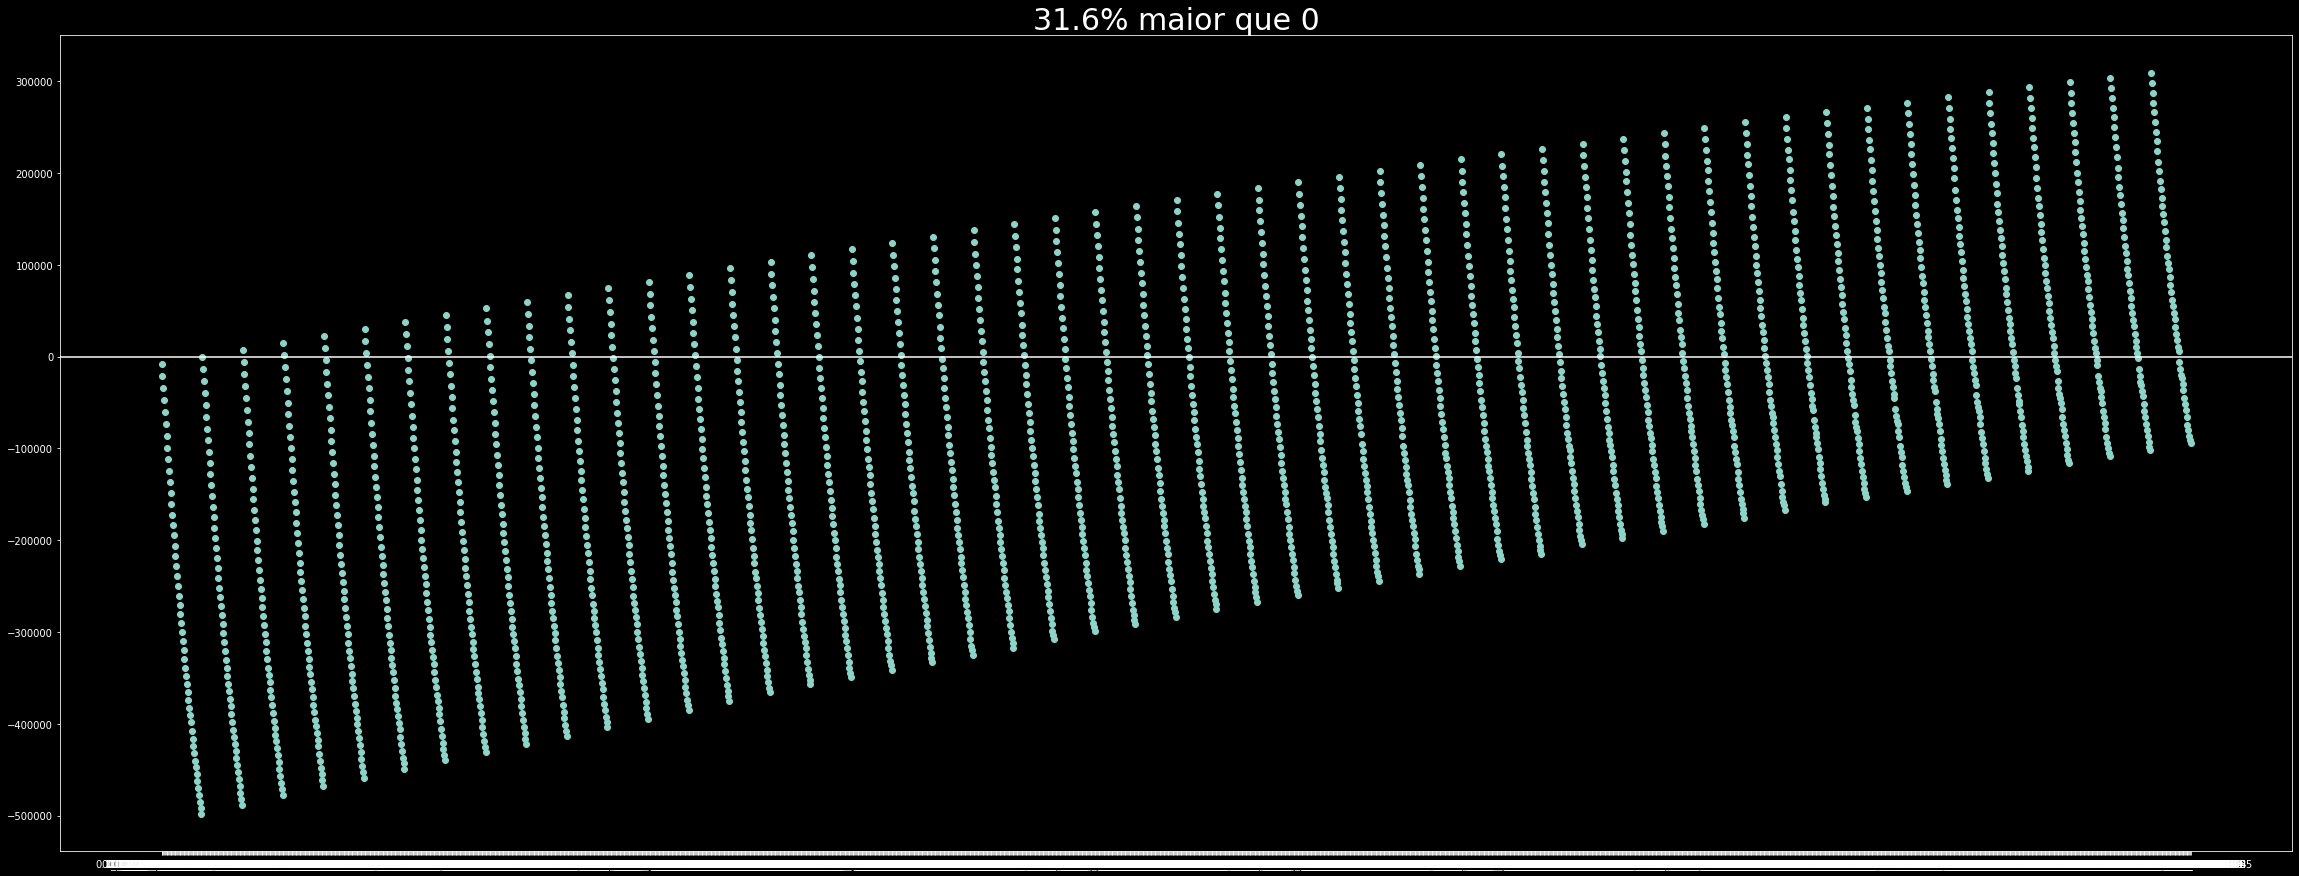

In [17]:
plt.scatter(results.loc['Net_Profit'].index, results.loc['Net_Profit'].values)
plt.axhline(y=0)
plt.title(f"{results.loc['Net_Profit'][results.loc['Net_Profit'] > 0].size / results.loc['Net_Profit'].size * 100}% maior que 0", size=30)
plt.show()

In [18]:
results[results.loc['Net_Profit'][results.loc['Net_Profit'] > 0].index.to_list()].loc['Annualized_Return_%'].describe()

count    790.000000
mean      54.049405
std       15.994114
min      -20.586660
25%       45.513697
50%       57.419357
75%       66.069300
max       77.445750
Name: Annualized_Return_%, dtype: float64

In [19]:
results[results.loc['Net_Profit'][results.loc['Net_Profit'] > 0].index.to_list()].loc['Max_DD_%'].describe()

count    790.000000
mean     -73.312783
std       92.610944
min     -398.249030
25%     -117.952153
50%      -22.525973
75%       -6.036563
max       -0.965956
Name: Max_DD_%, dtype: float64

In [20]:
net_filter = results[results.loc['Net_Profit'][results.loc['Net_Profit'] > 0].index.to_list()]
net_filter

,0.2_0.1,0.30000000000000004_0.1,0.4_0.1,0.4_0.2,0.5_0.1,0.5_0.2,0.6_0.1,0.6_0.2,0.6_0.30000000000000004,0.7000000000000001_0.1,0.7000000000000001_0.2,0.7000000000000001_0.30000000000000004,0.8_0.1,0.8_0.2,0.8_0.30000000000000004,0.8_0.4,0.9_0.1,0.9_0.2,0.9_0.30000000000000004,0.9_0.4,0.9_0.5,1.0_0.1,1.0_0.2,1.0_0.30000000000000004,1.0_0.4,1.0_0.5,1.1_0.1,1.1_0.2,1.1_0.30000000000000004,1.1_0.4,1.1_0.5,1.1_0.6,1.2000000000000002_0.1,1.2000000000000002_0.2,1.2000000000000002_0.30000000000000004,1.2000000000000002_0.4,1.2000000000000002_0.5,1.2000000000000002_0.6,1.3000000000000003_0.1,1.3000000000000003_0.2,...,4.9_3.0000000000000004,4.9_3.1,4.9_3.2,4.9_3.3000000000000003,4.9_3.4000000000000004,5.0_0.1,5.0_0.2,5.0_0.30000000000000004,5.0_0.4,5.0_0.5,5.0_0.6,5.0_0.7000000000000001,5.0_0.8,5.0_0.9,5.0_1.0,5.0_1.1,5.0_1.2000000000000002,5.0_1.3000000000000003,5.0_1.4000000000000001,5.0_1.5000000000000002,5.0_1.6,5.0_1.7000000000000002,5.0_1.8000000000000003,5.0_1.9000000000000001,5.0_2.0,5.0_2.1,5.0_2.2,5.0_2.3000000000000003,5.0_2.4000000000000004,5.0_2.5000000000000004,5.0_2.6,5.0_2.7,5.0_2.8000000000000003,5.0_2.9000000000000004,5.0_3.0000000000000004,5.0_3.1,5.0_3.2,5.0_3.3000000000000003,5.0_3.4000000000000004,5.0_3.5000000000000004
Analises,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Total_Trades,33614.000000,33614.000000,33614.000000,33613.000000,33613.000000,33609.000000,33611.000000,33606.000000,33604.000000,33609.000000,33603.000000,33597.000000,33606.000000,33599.000000,33592.000000,33583.000000,33598.000000,33588.000000,33579.000000,33569.000000,33559.000000,33585.000000,33573.000000,33562.000000,33545.000000,33532.000000,33573.000000,33561.000000,33549.000000,33532.000000,33517.000000,33501.000000,33564.000000,33551.000000,33537.000000,33519.000000,33501.000000,33484.000000,33546.000000,33530.000000,...,30194.000000,30092.000000,30023.000000,29977.000000,29955.000000,32051.000000,32007.000000,31956.000000,31853.000000,31798.000000,31773.000000,31696.000000,31624.000000,31537.000000,31456.000000,31370.000000,31254.000000,31116.000000,31068.000000,30997.000000,30938.000000,30873.000000,30828.000000,30800.000000,30729.000000,30692.000000,30602.000000,30580.000000,30502.000000,30446.000000,30330.000000,30290.000000,30239.000000,30190.000000,30168.000000,30060.000000,29992.000000,29951.000000,29908.000000,29749.000000
Average_Trades_Per_Year,92.093151,92.093151,92.093151,92.090411,92.090411,92.079452,92.084932,92.071233,92.065753,92.079452,92.063014,92.046575,92.071233,92.052055,92.032877,92.008219,92.049315,92.021918,91.997260,91.969863,91.942466,92.013699,91.980822,91.950685,91.904110,91.868493,91.980822,91.947945,91.915068,91.868493,91.827397,91.783562,91.956164,91.920548,91.882192,91.832877,91.783562,91.736986,91.906849,91.863014,...,82.723288,82.443836,82.254795,82.128767,82.068493,87.810959,87.690411,87.550685,87.268493,87.117808,87.049315,86.838356,86.641096,86.402740,86.180822,85.945205,85.627397,85.249315,85.117808,84.923288,84.761644,84.583562,84.460274,84.383562,84.189041,84.087671,83.841096,83.780822,83.567123,83.413699,83.095890,82.986301,82.846575,82.712329,82.652055,82.356164,82.169863,82.057534,81.939726,81.504110
Annualized_Return_%,-20.586660,22.625788,31.307032,5.856217,36.709425,25.087574,40.648626,32.684825,14.245907,43.793269,37.665579,27.495028,46.408065,41.397731,34.174386,19.791630,48.640913,44.383144,38.717575,29.851254,0.292282,50.587582,46.872059,42.177172,35.613931,23.846869,52.347202,49.059834,45.056319,39.829092,32.007568,13.302627,53.926320,50.965973,47.464509,43.091976,37.139535,27.101180,55.350291,52.651238,...,42.024672,37.796946,32.828133,26.494812,13.304363,77.445750,76.810475,76.127395,75.451171,74.837030,74.082375,73.345074,72.582232,71.773587,70.850449,70.033563,69.107251,68.321158,67.404699,66.514434,65.593400,64.639617,63.497360,62.370059,61.277690,60.014208,58.859112,57.800871,56.340749,54.669828,53.033782,51.102976,49.211071,47.115765,44.79699

In [21]:
annualized = net_filter[net_filter.loc['Annualized_Return_%'][net_filter.loc['Annualized_Return_%'] > 0].index.to_list()]
annualized

,0.30000000000000004_0.1,0.4_0.1,0.4_0.2,0.5_0.1,0.5_0.2,0.6_0.1,0.6_0.2,0.6_0.30000000000000004,0.7000000000000001_0.1,0.7000000000000001_0.2,0.7000000000000001_0.30000000000000004,0.8_0.1,0.8_0.2,0.8_0.30000000000000004,0.8_0.4,0.9_0.1,0.9_0.2,0.9_0.30000000000000004,0.9_0.4,0.9_0.5,1.0_0.1,1.0_0.2,1.0_0.30000000000000004,1.0_0.4,1.0_0.5,1.1_0.1,1.1_0.2,1.1_0.30000000000000004,1.1_0.4,1.1_0.5,1.1_0.6,1.2000000000000002_0.1,1.2000000000000002_0.2,1.2000000000000002_0.30000000000000004,1.2000000000000002_0.4,1.2000000000000002_0.5,1.2000000000000002_0.6,1.3000000000000003_0.1,1.3000000000000003_0.2,1.3000000000000003_0.30000000000000004,...,4.9_3.0000000000000004,4.9_3.1,4.9_3.2,4.9_3.3000000000000003,4.9_3.4000000000000004,5.0_0.1,5.0_0.2,5.0_0.30000000000000004,5.0_0.4,5.0_0.5,5.0_0.6,5.0_0.7000000000000001,5.0_0.8,5.0_0.9,5.0_1.0,5.0_1.1,5.0_1.2000000000000002,5.0_1.3000000000000003,5.0_1.4000000000000001,5.0_1.5000000000000002,5.0_1.6,5.0_1.7000000000000002,5.0_1.8000000000000003,5.0_1.9000000000000001,5.0_2.0,5.0_2.1,5.0_2.2,5.0_2.3000000000000003,5.0_2.4000000000000004,5.0_2.5000000000000004,5.0_2.6,5.0_2.7,5.0_2.8000000000000003,5.0_2.9000000000000004,5.0_3.0000000000000004,5.0_3.1,5.0_3.2,5.0_3.3000000000000003,5.0_3.4000000000000004,5.0_3.5000000000000004
Analises,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Total_Trades,33614.000000,33614.000000,33613.000000,33613.000000,33609.000000,33611.000000,33606.000000,33604.000000,33609.000000,33603.000000,33597.000000,33606.000000,33599.000000,33592.000000,33583.000000,33598.000000,33588.000000,33579.000000,33569.000000,33559.000000,33585.000000,33573.000000,33562.000000,33545.000000,33532.000000,33573.000000,33561.000000,33549.000000,33532.000000,33517.000000,33501.000000,33564.000000,33551.000000,33537.000000,33519.000000,33501.000000,33484.000000,33546.000000,33530.000000,33516.000000,...,30194.000000,30092.000000,30023.000000,29977.000000,29955.000000,32051.000000,32007.000000,31956.000000,31853.000000,31798.000000,31773.000000,31696.000000,31624.000000,31537.000000,31456.000000,31370.000000,31254.000000,31116.000000,31068.000000,30997.000000,30938.000000,30873.000000,30828.000000,30800.000000,30729.000000,30692.000000,30602.000000,30580.000000,30502.000000,30446.000000,30330.000000,30290.000000,30239.000000,30190.000000,30168.000000,30060.000000,29992.000000,29951.000000,29908.000000,29749.000000
Average_Trades_Per_Year,92.093151,92.093151,92.090411,92.090411,92.079452,92.084932,92.071233,92.065753,92.079452,92.063014,92.046575,92.071233,92.052055,92.032877,92.008219,92.049315,92.021918,91.997260,91.969863,91.942466,92.013699,91.980822,91.950685,91.904110,91.868493,91.980822,91.947945,91.915068,91.868493,91.827397,91.783562,91.956164,91.920548,91.882192,91.832877,91.783562,91.736986,91.906849,91.863014,91.824658,...,82.723288,82.443836,82.254795,82.128767,82.068493,87.810959,87.690411,87.550685,87.268493,87.117808,87.049315,86.838356,86.641096,86.402740,86.180822,85.945205,85.627397,85.249315,85.117808,84.923288,84.761644,84.583562,84.460274,84.383562,84.189041,84.087671,83.841096,83.780822,83.567123,83.413699,83.095890,82.986301,82.846575,82.712329,82.652055,82.356164,82.169863,82.057534,81.939726,81.504110
Annualized_Return_%,22.625788,31.307032,5.856217,36.709425,25.087574,40.648626,32.684825,14.245907,43.793269,37.665579,27.495028,46.408065,41.397731,34.174386,19.791630,48.640913,44.383144,38.717575,29.851254,0.292282,50.587582,46.872059,42.177172,35.613931,23.846869,52.347202,49.059834,45.056319,39.829092,32.007568,13.302627,53.926320,50.965973,47.464509,43.091976,37.139535,27.101180,55.350291,52.651238,49.538576,...,42.024672,37.796946,32.828133,26.494812,13.304363,77.445750,76.810475,76.127395,75.451171,74.837030,74.082375,73.345074,72.582232,71.773587,70.850449,70.033563,69.107251,68.321158,67.404699,66.514434,65.593400,64.639617,63.497360,62.370059,61.277690,60.014208,58.859112,57.800871,56.340749,54.669828,53.033782,51.10297

In [22]:
max_dd = annualized[annualized.loc['Max_DD_%'][annualized.loc['Max_DD_%'] > -20].index.to_list()]
max_dd

,0.30000000000000004_0.1,0.4_0.1,0.5_0.1,0.6_0.1,0.6_0.2,0.7000000000000001_0.1,0.7000000000000001_0.2,0.8_0.1,0.8_0.2,0.9_0.1,0.9_0.2,0.9_0.30000000000000004,1.0_0.1,1.0_0.2,1.0_0.30000000000000004,1.1_0.1,1.1_0.2,1.1_0.30000000000000004,1.1_0.4,1.2000000000000002_0.1,1.2000000000000002_0.2,1.2000000000000002_0.30000000000000004,1.2000000000000002_0.4,1.3000000000000003_0.1,1.3000000000000003_0.2,1.3000000000000003_0.30000000000000004,1.3000000000000003_0.4,1.4000000000000001_0.1,1.4000000000000001_0.2,1.4000000000000001_0.30000000000000004,1.4000000000000001_0.4,1.4000000000000001_0.5,1.5000000000000002_0.1,1.5000000000000002_0.2,1.5000000000000002_0.30000000000000004,1.5000000000000002_0.4,1.5000000000000002_0.5,1.6_0.1,1.6_0.2,1.6_0.30000000000000004,...,4.7_1.3000000000000003,4.8_0.1,4.8_0.2,4.8_0.30000000000000004,4.8_0.4,4.8_0.5,4.8_0.6,4.8_0.7000000000000001,4.8_0.8,4.8_0.9,4.8_1.0,4.8_1.1,4.8_1.2000000000000002,4.8_1.3000000000000003,4.9_0.1,4.9_0.2,4.9_0.30000000000000004,4.9_0.4,4.9_0.5,4.9_0.6,4.9_0.7000000000000001,4.9_0.8,4.9_0.9,4.9_1.0,4.9_1.1,4.9_1.2000000000000002,4.9_1.3000000000000003,5.0_0.1,5.0_0.2,5.0_0.30000000000000004,5.0_0.4,5.0_0.5,5.0_0.6,5.0_0.7000000000000001,5.0_0.8,5.0_0.9,5.0_1.0,5.0_1.1,5.0_1.2000000000000002,5.0_1.3000000000000003
Analises,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Total_Trades,33614.000000,33614.000000,33613.000000,33611.000000,33606.000000,33609.000000,33603.000000,33606.000000,33599.000000,33598.000000,33588.000000,33579.000000,33585.000000,33573.000000,33562.000000,33573.000000,33561.000000,33549.000000,33532.000000,33564.000000,33551.000000,33537.000000,33519.000000,33546.000000,33530.000000,33516.000000,33494.000000,33531.000000,33513.000000,33492.000000,33467.000000,33448.000000,33516.000000,33496.000000,33473.000000,33447.000000,33425.000000,33488.000000,33465.000000,33439.000000,...,31355.000000,32163.000000,32108.000000,32052.000000,31936.000000,31869.000000,31865.000000,31783.000000,31703.000000,31620.000000,31552.000000,31460.000000,31350.000000,31255.000000,32097.000000,32047.000000,31994.000000,31886.000000,31833.000000,31806.000000,31731.000000,31650.000000,31557.000000,31499.000000,31406.000000,31297.000000,31175.000000,32051.000000,32007.000000,31956.000000,31853.000000,31798.000000,31773.000000,31696.000000,31624.000000,31537.000000,31456.000000,31370.000000,31254.000000,31116.000000
Average_Trades_Per_Year,92.093151,92.093151,92.090411,92.084932,92.071233,92.079452,92.063014,92.071233,92.052055,92.049315,92.021918,91.997260,92.013699,91.980822,91.950685,91.980822,91.947945,91.915068,91.868493,91.956164,91.920548,91.882192,91.832877,91.906849,91.863014,91.824658,91.764384,91.865753,91.816438,91.758904,91.690411,91.638356,91.824658,91.769863,91.706849,91.635616,91.575342,91.747945,91.684932,91.613699,...,85.904110,88.117808,87.967123,87.813699,87.495890,87.312329,87.301370,87.076712,86.857534,86.630137,86.443836,86.191781,85.890411,85.630137,87.936986,87.800000,87.654795,87.358904,87.213699,87.139726,86.934247,86.712329,86.457534,86.298630,86.043836,85.745205,85.410959,87.810959,87.690411,87.550685,87.268493,87.117808,87.049315,86.838356,86.641096,86.402740,86.180822,85.945205,85.627397,85.249315
Annualized_Return_%,22.625788,31.307032,36.709425,40.648626,32.684825,43.793269,37.665579,46.408065,41.397731,48.640913,44.383144,38.717575,50.587582,46.872059,42.177172,52.347202,49.059834,45.056319,39.829092,53.926320,50.965973,47.464509,43.091976,55.350291,52.651238,49.538576,45.762717,56.672920,54.191005,51.372532,48.037484,43.965399,57.898695,55.610911,53.036656,50.053629,46.513236,59.017412,56.889977,54.511587,...,66.516735,76.831887,76.144043,75.433703,74.722326,74.045827,73.286253,72.507322,71.695383,70.838957,69.869393,68.978280,67.997497,67.116065,77.133677,76.475334,75.772907,75.074698,74.442790,73.672767,72.918051,72.112855,71.275276,70.336964,69.495509,68.545748,67.708452,77.445750,76.810475,76.127395,75.451171,74.8

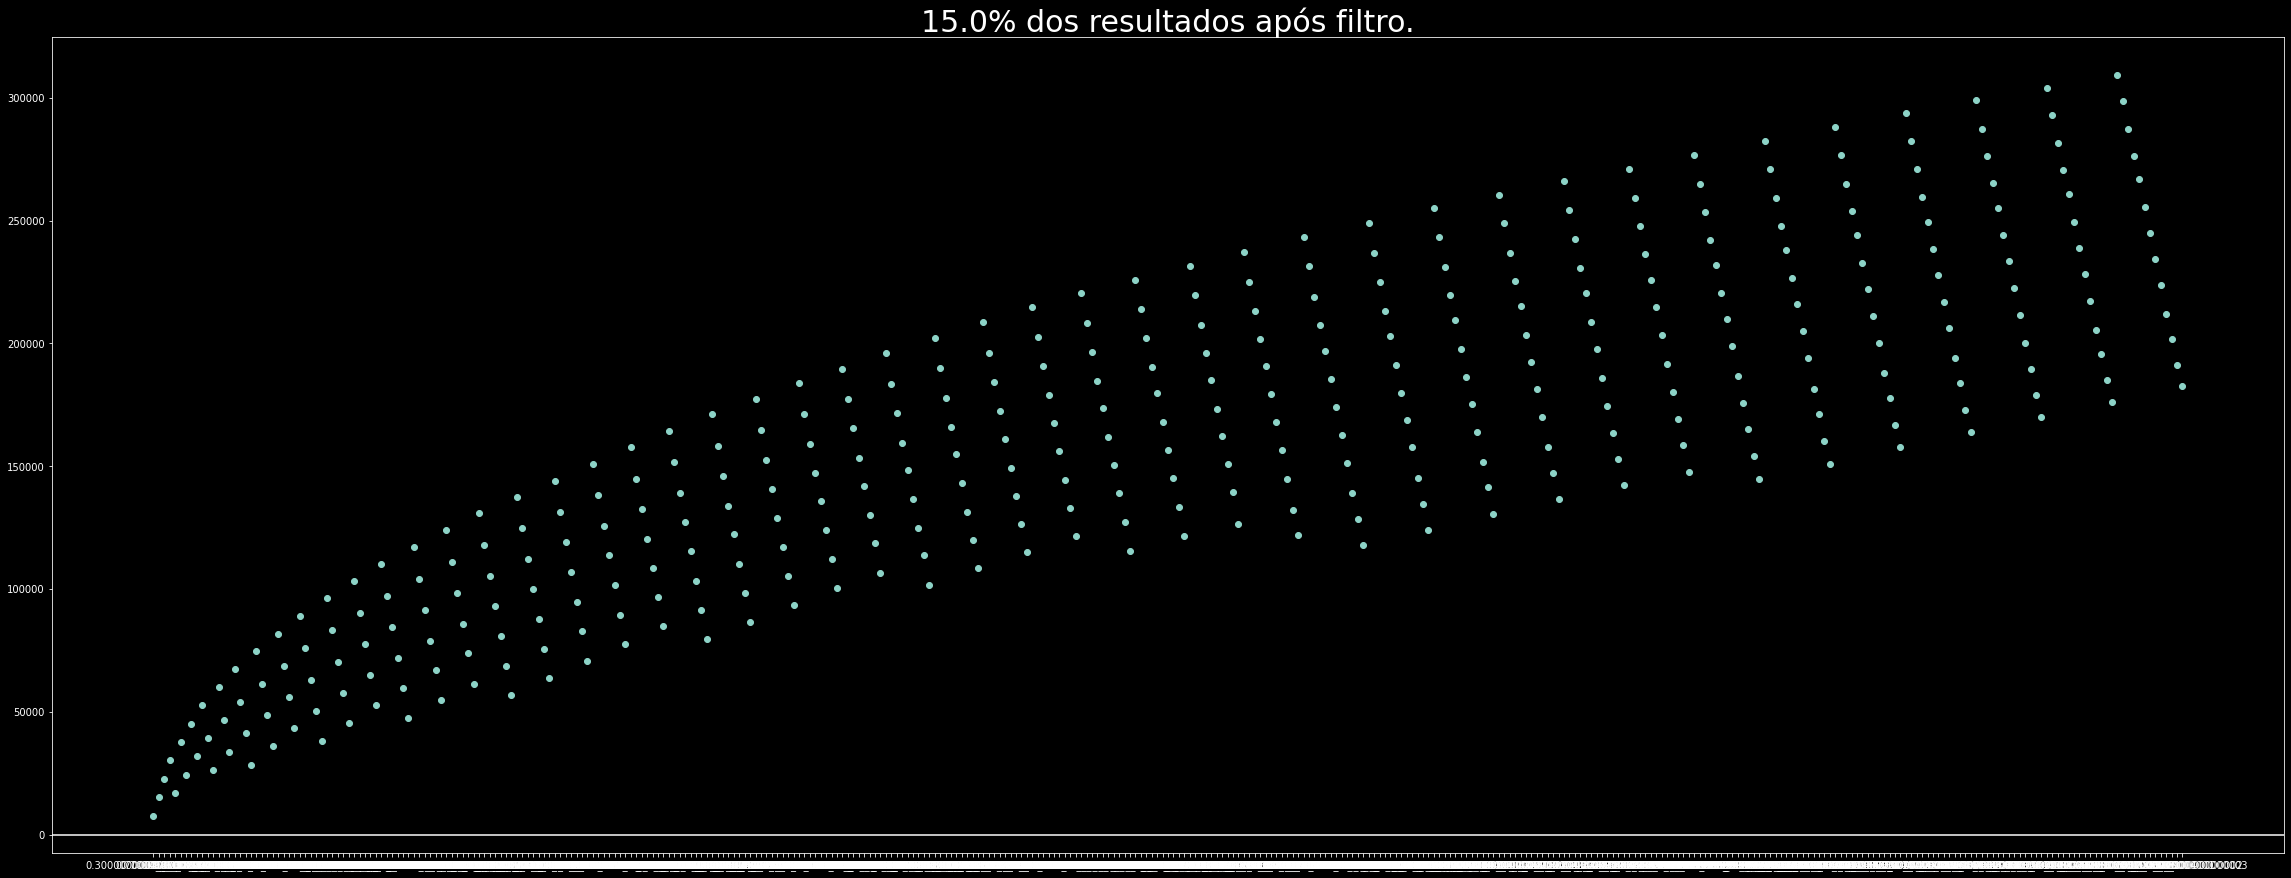

In [23]:
plt.scatter(max_dd.loc['Net_Profit'].index, max_dd.loc['Net_Profit'].values)
plt.axhline(y=0)
plt.title(f"{max_dd.loc['Net_Profit'].size / results.loc['Net_Profit'].size * 100}% dos resultados após filtro.", size=30)
plt.show()

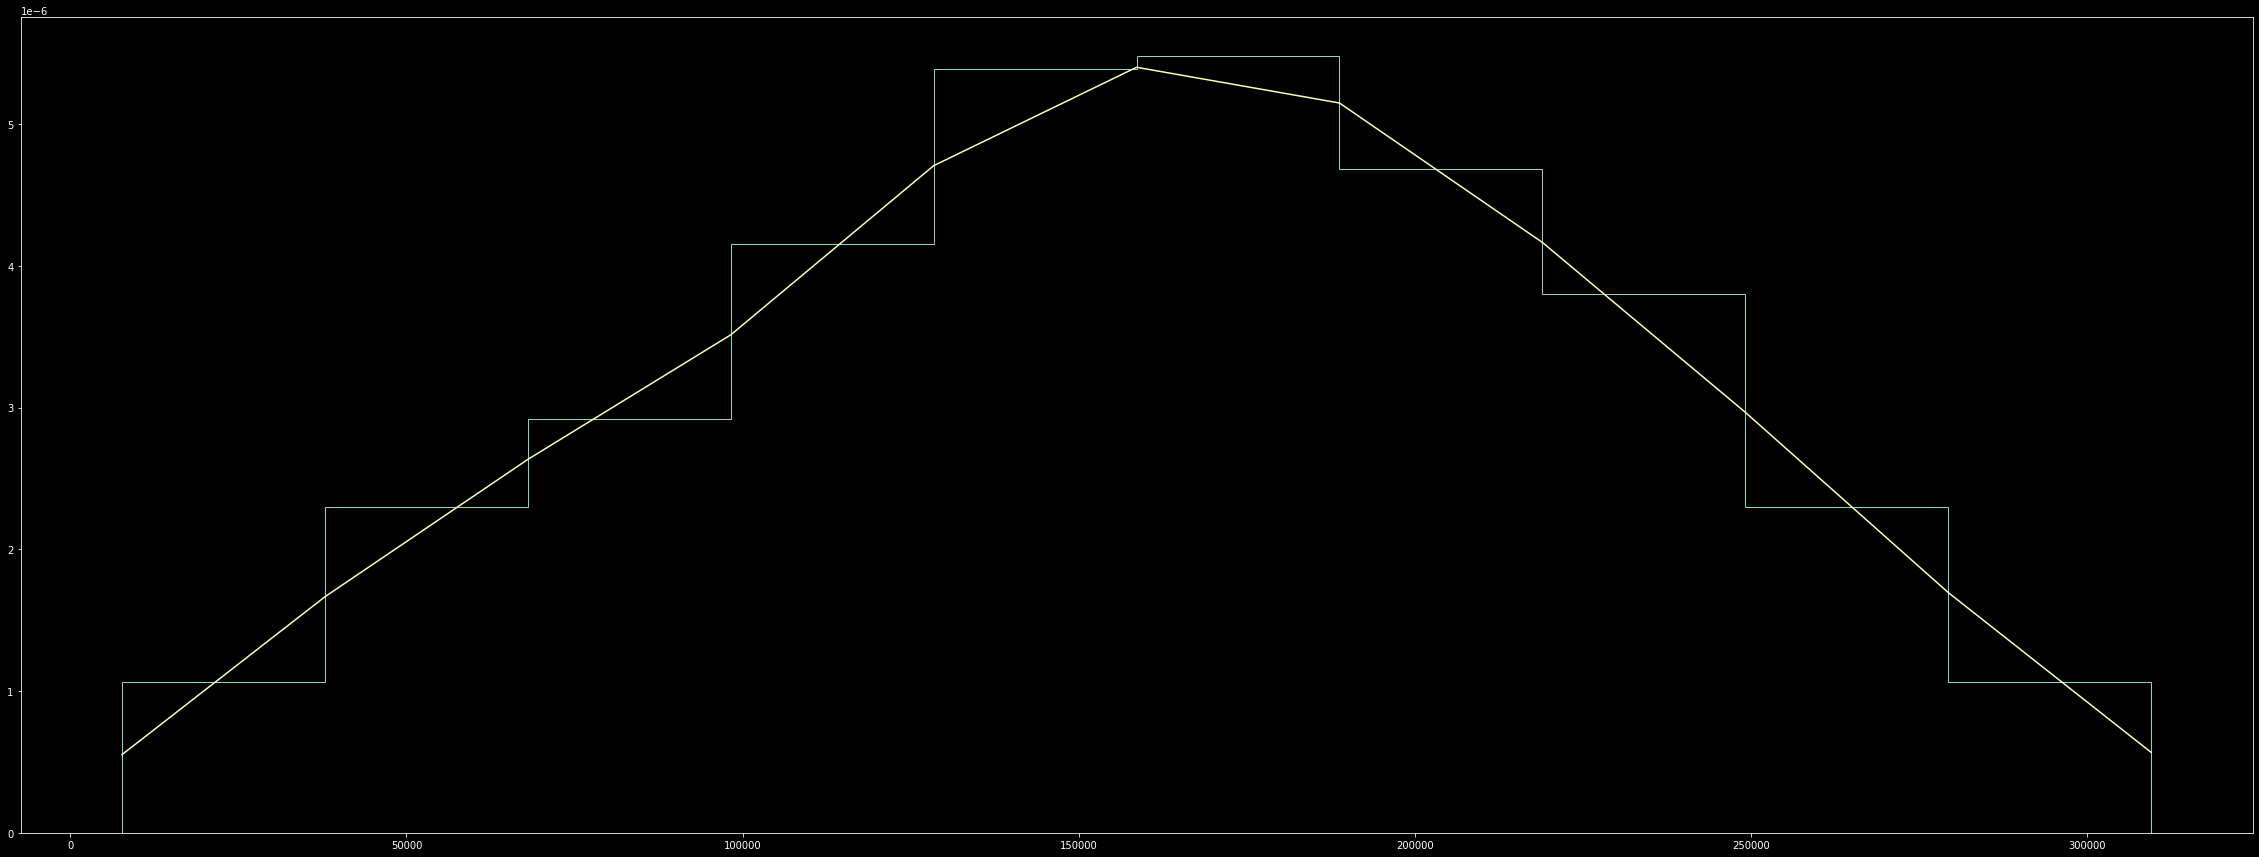

In [24]:
density = stats.gaussian_kde(max_dd.loc['Net_Profit'])
n, x, _ = plt.hist(max_dd.loc['Net_Profit'],histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.show()

In [25]:
quantile_remove = max_dd[max_dd.loc['Net_Profit'][(max_dd.loc['Net_Profit'] > max_dd.loc['Net_Profit'].quantile(0.25)) & (max_dd.loc['Net_Profit'] < max_dd.loc['Net_Profit'].quantile(0.75))].index]

In [26]:
quantile_remove

,1.8000000000000003_0.1,1.9000000000000001_0.1,2.0_0.1,2.0_0.2,2.1_0.1,2.1_0.2,2.2_0.1,2.2_0.2,2.2_0.30000000000000004,2.3000000000000003_0.1,2.3000000000000003_0.2,2.3000000000000003_0.30000000000000004,2.4000000000000004_0.1,2.4000000000000004_0.2,2.4000000000000004_0.30000000000000004,2.4000000000000004_0.4,2.5000000000000004_0.1,2.5000000000000004_0.2,2.5000000000000004_0.30000000000000004,2.5000000000000004_0.4,2.5000000000000004_0.5,2.6_0.1,2.6_0.2,2.6_0.30000000000000004,2.6_0.4,2.6_0.5,2.7_0.1,2.7_0.2,2.7_0.30000000000000004,2.7_0.4,2.7_0.5,2.7_0.6,2.8000000000000003_0.1,2.8000000000000003_0.2,2.8000000000000003_0.30000000000000004,2.8000000000000003_0.4,2.8000000000000003_0.5,2.8000000000000003_0.6,2.9000000000000004_0.1,2.9000000000000004_0.2,...,4.2_1.2000000000000002,4.3_0.7000000000000001,4.3_0.8,4.3_0.9,4.3_1.0,4.3_1.1,4.3_1.2000000000000002,4.3999999999999995_0.8,4.3999999999999995_0.9,4.3999999999999995_1.0,4.3999999999999995_1.1,4.3999999999999995_1.2000000000000002,4.3999999999999995_1.3000000000000003,4.5_0.8,4.5_0.9,4.5_1.0,4.5_1.1,4.5_1.2000000000000002,4.5_1.3000000000000003,4.6_0.9,4.6_1.0,4.6_1.1,4.6_1.2000000000000002,4.6_1.3000000000000003,4.7_0.9,4.7_1.0,4.7_1.1,4.7_1.2000000000000002,4.7_1.3000000000000003,4.8_1.0,4.8_1.1,4.8_1.2000000000000002,4.8_1.3000000000000003,4.9_1.0,4.9_1.1,4.9_1.2000000000000002,4.9_1.3000000000000003,5.0_1.1,5.0_1.2000000000000002,5.0_1.3000000000000003
Analises,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Total_Trades,33436.000000,33397.000000,33367.000000,33332.000000,33334.000000,33294.000000,33299.000000,33256.000000,33225.000000,33258.000000,33211.000000,33178.000000,33226.000000,33175.000000,33138.000000,33082.000000,33190.000000,33137.000000,33095.000000,33032.000000,32979.000000,33157.000000,33104.000000,33065.000000,32998.000000,32944.000000,33113.000000,33055.000000,33013.000000,32951.000000,32893.000000,32853.000000,33076.000000,33015.000000,32976.000000,32913.000000,32856.000000,32819.000000,33017.000000,32969.000000,...,31708.000000,32029.000000,31938.000000,31839.000000,31795.000000,31706.000000,31641.000000,31895.000000,31819.000000,31771.000000,31681.000000,31609.000000,31516.000000,31850.000000,31760.000000,31720.000000,31632.000000,31571.000000,31482.000000,31714.000000,31658.000000,31564.000000,31501.000000,31416.000000,31666.000000,31606.000000,31516.000000,31451.000000,31355.000000,31552.000000,31460.000000,31350.000000,31255.000000,31499.000000,31406.000000,31297.000000,31175.000000,31370.000000,31254.000000,31116.000000
Average_Trades_Per_Year,91.605479,91.498630,91.416438,91.320548,91.326027,91.216438,91.230137,91.112329,91.027397,91.117808,90.989041,90.898630,91.030137,90.890411,90.789041,90.635616,90.931507,90.786301,90.671233,90.498630,90.353425,90.841096,90.695890,90.589041,90.405479,90.257534,90.720548,90.561644,90.446575,90.276712,90.117808,90.008219,90.619178,90.452055,90.345205,90.172603,90.016438,89.915068,90.457534,90.326027,...,86.871233,87.750685,87.501370,87.230137,87.109589,86.865753,86.687671,87.383562,87.175342,87.043836,86.797260,86.600000,86.345205,87.260274,87.013699,86.904110,86.663014,86.495890,86.252055,86.887671,86.734247,86.476712,86.304110,86.071233,86.756164,86.591781,86.345205,86.167123,85.904110,86.443836,86.191781,85.890411,85.630137,86.298630,86.043836,85.745205,85.410959,85.945205,85.627397,85.249315
Annualized_Return_%,61.026611,61.933321,62.800340,61.133900,63.625679,62.046755,64.396441,62.885343,61.284417,65.144109,63.697203,62.174505,65.882360,64.489543,63.034912,61.482542,66.568394,65.229019,63.826032,62.351089,60.788016,67.235281,65.944828,64.608949,63.200220,61.719183,67.854352,66.609339,65.329885,63.985822,62.580997,61.008648,68.439908,67.240635,66.035324,64.745700,63.411578,61.932330,68.978679,67.844647,...,64.177362,70.170596,69.136421,68.122252,67.045326,65.983552,64.792878,69.790151,68.701521,67.674640,66.649240,65.482342,64.449309,70.297317,69.356555,68.236987,67.241935

In [27]:
%%time
results_after_clean = pd.DataFrame()
for i in quantile_remove.columns:
  x = i.split('_')
  a = robot.back_big_tpsl_ohl(round(float(x[0]),1), round(float(x[1]),1), analyse=False, multi_test=False, plot=False)
  results_after_clean[f'{i}'] = a['Result']

CPU times: user 2min 55s, sys: 1.64 s, total: 2min 56s
Wall time: 2min 56s


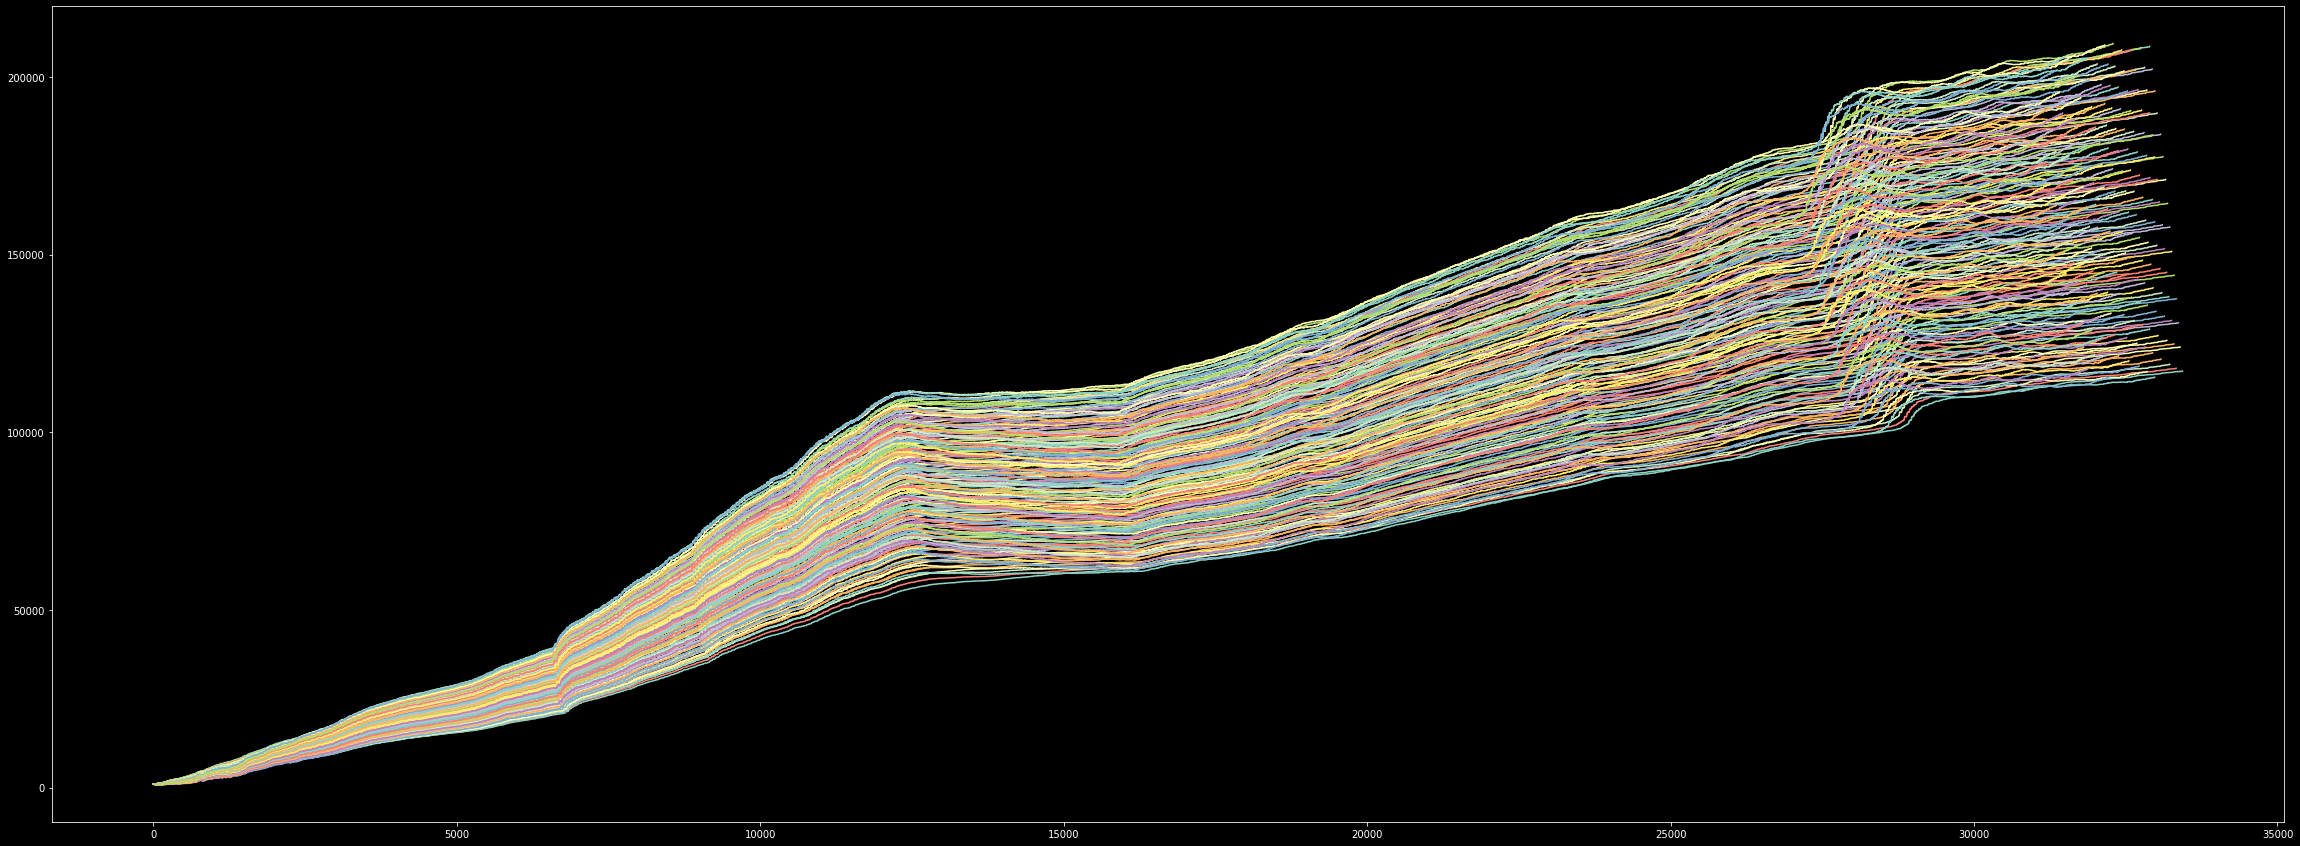

In [28]:
  plt.plot(results_after_clean)
  plt.show()

In [29]:
quantile_remove.loc['Annualized_Return_%'].max()

70.64565175667892

In [30]:
quantile_remove.loc['Annualized_Return_%'][quantile_remove.loc['Annualized_Return_%'] == quantile_remove.loc['Annualized_Return_%'].max()]

4.0_0.5    70.645652
Name: Annualized_Return_%, dtype: float64

In [31]:
quantile_remove.loc['Net_Profit'].max()

209388.234375

In [32]:
quantile_remove.loc['Net_Profit'][quantile_remove.loc['Net_Profit'] == quantile_remove.loc['Net_Profit'].max()]

4.0_0.5    209388.234375
Name: Net_Profit, dtype: float64

In [33]:
wfa_test = quantile_remove.loc['Net_Profit'][quantile_remove.loc['Net_Profit'] == quantile_remove.loc['Net_Profit'].max()].index[0].split('_')

In [34]:
wfa_test = [round(float(wfa_test[0]),1), round(float(wfa_test[1]),1)]
wfa_test

[4.0, 0.5]

In [35]:
wfa_result = robot.back_big_tpsl_ohl(wfa_test[0], wfa_test[1], multi_test=True, plot=True)

Output hidden; open in https://colab.research.google.com to view.

In [36]:
wfa_result

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,11.644592,33.596644,35.756312,38.897405,22.393637,0.350521,0.434852,3.429957,29.696097,17.281894,15.382821,14.403403,12.182378
1,12.162539,28.818025,36.186753,40.547846,23.712943,0.798942,0.391692,3.209635,27.453540,15.938652,15.024996,12.424106,11.678313
2,11.877587,25.382544,39.176084,38.386581,23.951127,1.008030,0.873370,3.341114,25.961989,15.355818,15.463199,12.664553,11.803862
3,11.714666,26.910645,38.298518,37.980828,24.216524,1.062160,0.872809,3.221227,25.459918,16.621999,16.170273,13.753826,11.882649
4,11.666685,26.936692,38.874561,39.396618,25.356168,1.051592,0.905846,3.214157,24.978841,16.426393,17.695878,14.468983,11.715194
5,11.530470,28.477020,37.026772,38.390404,24.584318,0.991073,0.874131,3.165423,25.770746,16.168549,17.097760,12.689555,11.658927
6,11.930645,27.926510,36.924383,39.714414,24.415932,1.000950,0.950777,3.093580,25.396768,16.473887,16.438121,12.693970,11.723713
7,11.339342,29.393728,36.205967,39.639753,24.918980,0.857049,0.953377,3.790786,25.512904,16.750874,16.105969,12.644483,11.620076
8,11.712975,28.902630,37.004263,40.381945,24.517862,0.785001,0.879295,3.835855,25.362927,16.260120,16.294243,13.507198,12.117288
9,11.816383,28.090019,36.936721,39.532138,24.841497,0.919124,0.911525,3.963306,25.448625,16.300766,16.463615,13.271462,12.460816


In [37]:
wfa_result.mean(axis=1)[1:]

1     17.565229
2     17.326605
3     17.551234
4     17.899047
5     17.571165
6     17.591050
7     17.671791
8     17.812431
9     17.765846
10    17.939310
11    17.705373
12    17.723695
13    17.778560
14    17.906780
15    17.809729
16    17.812739
17    17.875731
18    17.833199
19    17.792600
20    17.741749
21    17.789552
22    17.867545
23    17.807804
24    17.697641
25    17.716981
26    17.749954
27    17.715667
28    17.682383
dtype: float64

In [38]:
robot.get_big_data_csv('/content/drive/MyDrive/My_Project/Dados/Data_M1_3_9kk_icmarkets.csv',drop=True,drop_list=['Unnamed: 0'])
robot.set_big_data(robot.get_big_data().iloc[300_000:].reset_index())
robot.set_big_data(robot.get_big_data().drop(columns=['index']))
robot.big_data_to_array()

Dados Carregados com Sucesso.


In [39]:
analy_true = robot.back_big_tpsl_ohl(4.0, 0.5, tpsl_mean=10, analyse=True, multi_test=False, plot=False)

Period data set D1 | 0.1


In [40]:
analy_false = robot.back_big_tpsl_ohl(4.0, 0.5, tpsl_mean=10, analyse=False, multi_test=False, plot=False)

In [41]:
analy_true

Analises,Total_Trades,Average_Trades_Per_Year,Annualized_Return_%,Pessimistic_ROR_%,Max_DD_%,Max_DD_€,Shaper_Ration,Profit_Facotr,Net_Profit,Gross_Profit,Gross_Loss,RRR_Min_>3,Average_Win_Rate_%,Largest_Win_€,Smallest_Win_€,Average_Loss_Rate_%,Largest_Loss_€,Smallest_Loss_€
Result,32256,88.372603,70.644962,10.889185,-4.696456,-33.135193,9.059349,4.007102,209379.765625,277675.625000,-69295.875000,6318.954184,24.975198,473.656250,2.656250,75.021701,-0.046875,-57.859375
Short_Trades,16118,44.158904,34.565314,7.078949,-35.098961,-6631.703613,1.689834,1.420041,19468.447266,62436.656250,-43968.210938,2.935663,21.230922,129.281250,3.860352,78.762874,-0.046875,-57.867188
Long_Trades,16139,44.216438,69.076459,15.840061,-3.877229,-6.156372,6.393864,8.498067,190911.203125,215239.218750,-25328.021484,31010.341959,28.713055,473.656250,2.658203,71.280748,-0.062500,-19.500000
EURCHF,1127,3.087671,21.401193,40.060000,-3.886338,-184.390869,0.504152,5.222707,6953.917480,7363.894043,-1409.976440,37.712917,39.751553,161.011597,2.657715,60.159716,-0.452637,-17.653442
EURGBP,1029,2.819178,25.683078,35.861140,-2.329075,-345.800781,0.528706,5.117603,9834.858398,10980.490234,-2145.631348,28.440822,38.483965,104.339844,11.874512,61.418853,-1.417236,-11.911133
EURJPY,1064,2.915068,28.056374,46.388419,-2.772130,-4008.262207,0.599066,5.761384,11858.014648,13138.447266,-2280.432617,2.958393,41.541353,107.254395,12.811035,58.364662,-1.438965,-13.806641
EURNZD,959,2.627397,27.202376,34.181015,-2.090249,-3796.692871,0.489499,5.098772,11090.528320,12552.371094,-2461.842285,2.921102,37.956204,129.281250,13.965820,61.939520,-1.696289,-15.458984
EURUSD,1051,2.879452,25.991281,41.970341,-1.103222,-5160.154297,0.575358,5.532787,10078.709961,11081.607422,-2002.897949,1.953180,40.342531,74.921875,10.229736,59.562322,-1.278320,-8.950195
EURAUD,915,2.506849,23.922544,26.575418,-3.053121,-2995.839355,0.426886,4.284532,8540.891602,9836.771484,-2295.880127,2.850918,35.081967,81.175293,14.629883,64.808743,-1.686523,-16.880859
EURCAD,943,2.583562,22.921135,26.160502,-2.963714,-297.515625,0.435611,4.287162,7875.272949,8966.826172,-2091.552734,26.470115,34.888653,75.619141,12.491699,65.005302,-1.615234,-9.308594


In [42]:
analy_false

,Result,Short_Trades,Long_Trades,EURCHF,EURGBP,EURJPY,EURNZD,EURUSD,EURAUD,EURCAD,GBPAUD,GBPCHF,GBPJPY,GBPCAD,GBPUSD,GBPNZD,USDCHF,USDJPY,AUDUSD,NZDUSD,USDCAD,AUDJPY,CADJPY,CHFJPY,NZDJPY,AUDCHF,CADCHF,NZDCHF,AUDNZD,NZDCAD,AUDCAD
0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
1,996.164551,997.041748,996.164551,1015.335083,1026.486572,1029.786987,995.546509,997.131470,995.169678,996.112366,997.561218,1014.639954,999.931702,998.174377,998.553650,998.434021,996.164551,999.933167,997.041748,994.603455,996.248230,999.933167,999.933350,999.933594,999.936646,996.522156,996.407043,993.894653,998.258972,994.317261,997.127014
2,993.206299,991.645203,992.412781,1013.375000,1023.128113,1026.093750,1030.872437,1019.494080,1033.660278,1026.638916,995.007019,1012.825134,999.861511,996.345520,997.109314,996.835144,992.265381,999.862793,1019.716675,989.315735,992.529663,999.862793,999.862976,999.863159,999.865906,992.904297,992.732117,987.637268,1011.635925,988.720032,994.301514
3,987.809753,988.167358,986.730042,1028.643066,1049.415771,1056.548340,1026.386108,1016.611206,1029.407471,1023.267822,993.135254,1027.513062,999.793274,994.526367,995.677856,995.237976,988.360229,999.795898,1016.868958,984.213501,988.777466,999.795898,999.796448,999.796570,999.801819,989.431274,989.092590,981.484070,1009.885986,983.158630,991.317566
4,984.057983,984.574402,984.769958,1026.687866,1046.051636,1048.358276,1061.258301,1042.729004,1060.639404,1051.430786,991.393372,1025.711548,999.722900,992.704651,994.239990,993.623657,984.446350,999.725037,1047.406128,979.084717,985.032532,999.724976,999.726074,999.726196,999.730835,984.845642,985.412292,974.671082,1023.303894,977.824280,988.486938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32251,209259.203125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32252,209325.062500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32253,209323.265625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32254,209354.546875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


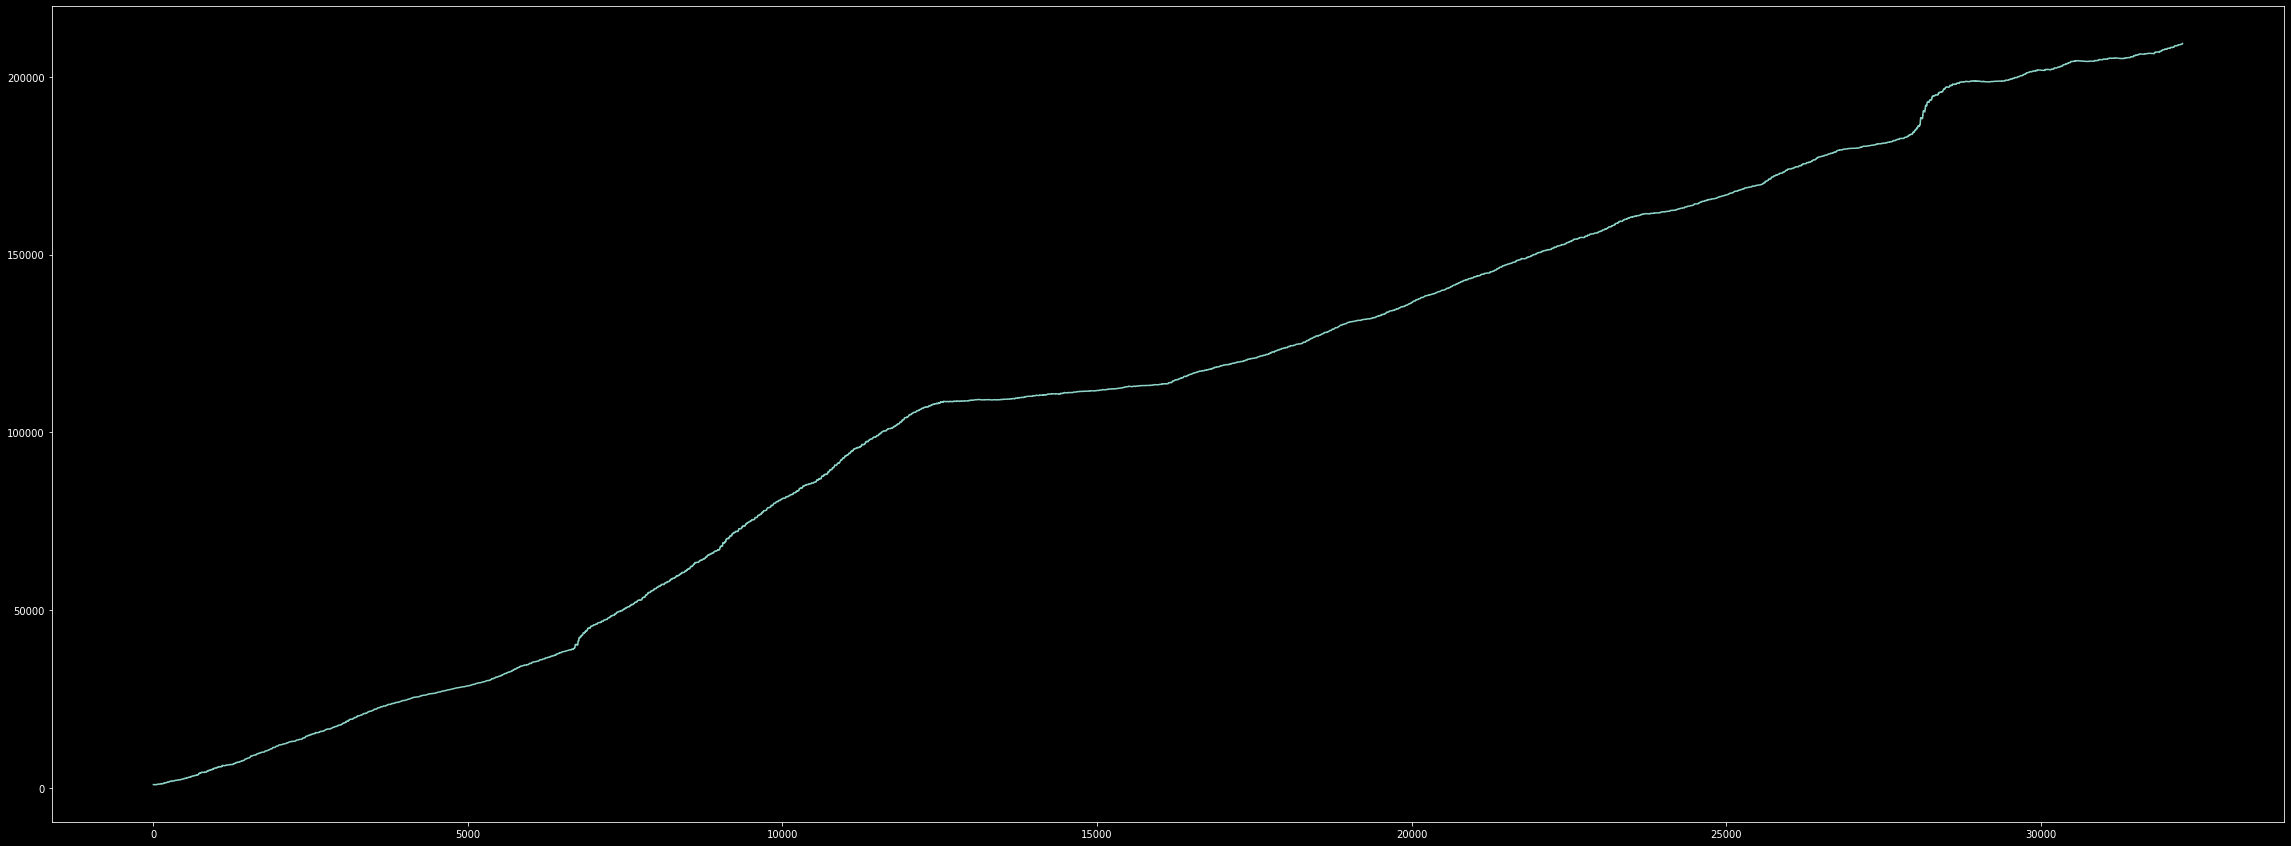

In [43]:
plt.plot(analy_false['Result'])
plt.show()

In [44]:
monte_carlo = robot.monte_carlo_simulation(analy_false['Result'], 100)

In [45]:
monte_carlo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-78428.546875,-123671.007812,-135586.078125,-139263.796875,157970.156250,65788.875000,-27075.144531,9629.758789,-18853.062500,70441.375000,-80502.500000,137734.125000,-6540.156250,35209.750000,-63931.234375,43457.687500,-70658.734375,11156.679688,-159960.343750,-18580.421875,-40275.718750,-73349.070312,-80873.093750,74183.750000,-43293.921875,74240.765625,152118.000000,161524.703125,152265.390625,137709.765625,178966.203125,153996.687500,-33525.421875,271.390625,51515.898438,17479.812500,-95344.414062,12750.494141,83299.593750,65643.789062,...,73712.437500,71174.093750,-125225.054688,-20232.304688,23056.390625,71262.554688,-80878.242188,-38244.992188,27360.015625,68533.640625,13119.070312,44538.062500,-96485.296875,-8123.734375,-75918.625000,-5617.908203,102520.804688,12259.466797,-80679.062500,100357.070312,125655.960938,75887.937500,-80284.671875,16621.085938,-46916.976562,-111031.414062,109561.343750,-35021.859375,103364.359375,-1174.148438,177751.328125,66100.187500,12467.741211,-28650.531250,-11715.656250,-88997.531250,-62055.769531,-39532.289062,85131.406250,-83806.703125
2,7027.195312,-74686.203125,-78687.117188,-86847.867188,134249.843750,78943.171875,-61007.324219,165543.156250,-62225.359375,39545.484375,18310.828125,-17257.687500,-87740.742188,41912.812500,-437.718750,8768.531250,-142753.343750,-69682.242188,-50192.492188,-42399.109375,-105530.562500,38277.437500,-198296.343750,-69254.562500,-69135.515625,77741.546875,-35133.140625,173208.593750,75185.367188,73877.343750,7650.359375,146279.937500,85591.250000,29082.984375,-102450.726562,19594.578125,-164381.562500,8583.435547,31971.828125,46050.492188,...,797.265625,-102817.546875,-26414.140625,48353.984375,-164743.015625,93702.414062,12652.625000,-37349.234375,94680.046875,98583.062500,52889.320312,87670.953125,38657.531250,-54324.546875,58131.312500,152130.328125,99867.210938,103965.492188,70622.328125,-27510.132812,100504.015625,-18618.664062,6156.359375,136160.796875,-40883.265625,-41240.929688,114258.882812,27230.343750,-56702.046875,-111030.953125,137484.625000,-55880.507812,25632.531250,-29491.562500,-11810.570312,45268.828125,-14769.031250,40155.765625,96617.234375,-6798.109375
3,-9270.773438,-77534.859375,-50010.265625,-120771.546875,201509.687500,-15334.820312,-63081.726562,85135.765625,-48272.250000,40605.312500,-85859.460938,162803.843750,-141275.187500,-112272.265625,-100838.148438,-9929.574219,-78566.484375,-16331.464844,-153377.312500,-30673.125000,-41592.074219,-31015.406250,-175203.531250,-66869.070312,-54382.968750,7832.531250,8774.187500,166885.296875,193710.406250,108334.125000,9487.699219,62327.007812,-33744.351562,1000.437500,-4109.070312,-174668.234375,-8241.218750,172483.234375,82252.328125,-4157.671875,...,30945.375000,67975.906250,-151102.531250,-13879.953125,-69804.429688,-74168.304688,23561.843750,-83842.734375,-37181.859375,72184.484375,107803.742188,47170.820312,-118055.546875,-15744.781250,3739.515625,130985.906250,172777.687500,149627.437500,-60203.875000,158.087891,162036.687500,117749.335938,-84694.554688,108066.515625,-37110.062500,-19071.453125,75642.914062,-27781.742188,83216.359375,-1159.664062,96510.648438,-119790.234375,130241.500000,-6321.000000,-97313.054688,38682.265625,-1359.523438,-540.078125,-92717.406250,-114326.015625
4,31621.367188,-41725.078125,-112310.914062,-47716.625000,127395.062500,49846.171875,-79365.015625,12220.992188,-66097.601562,-120099.000000,-97956.6015

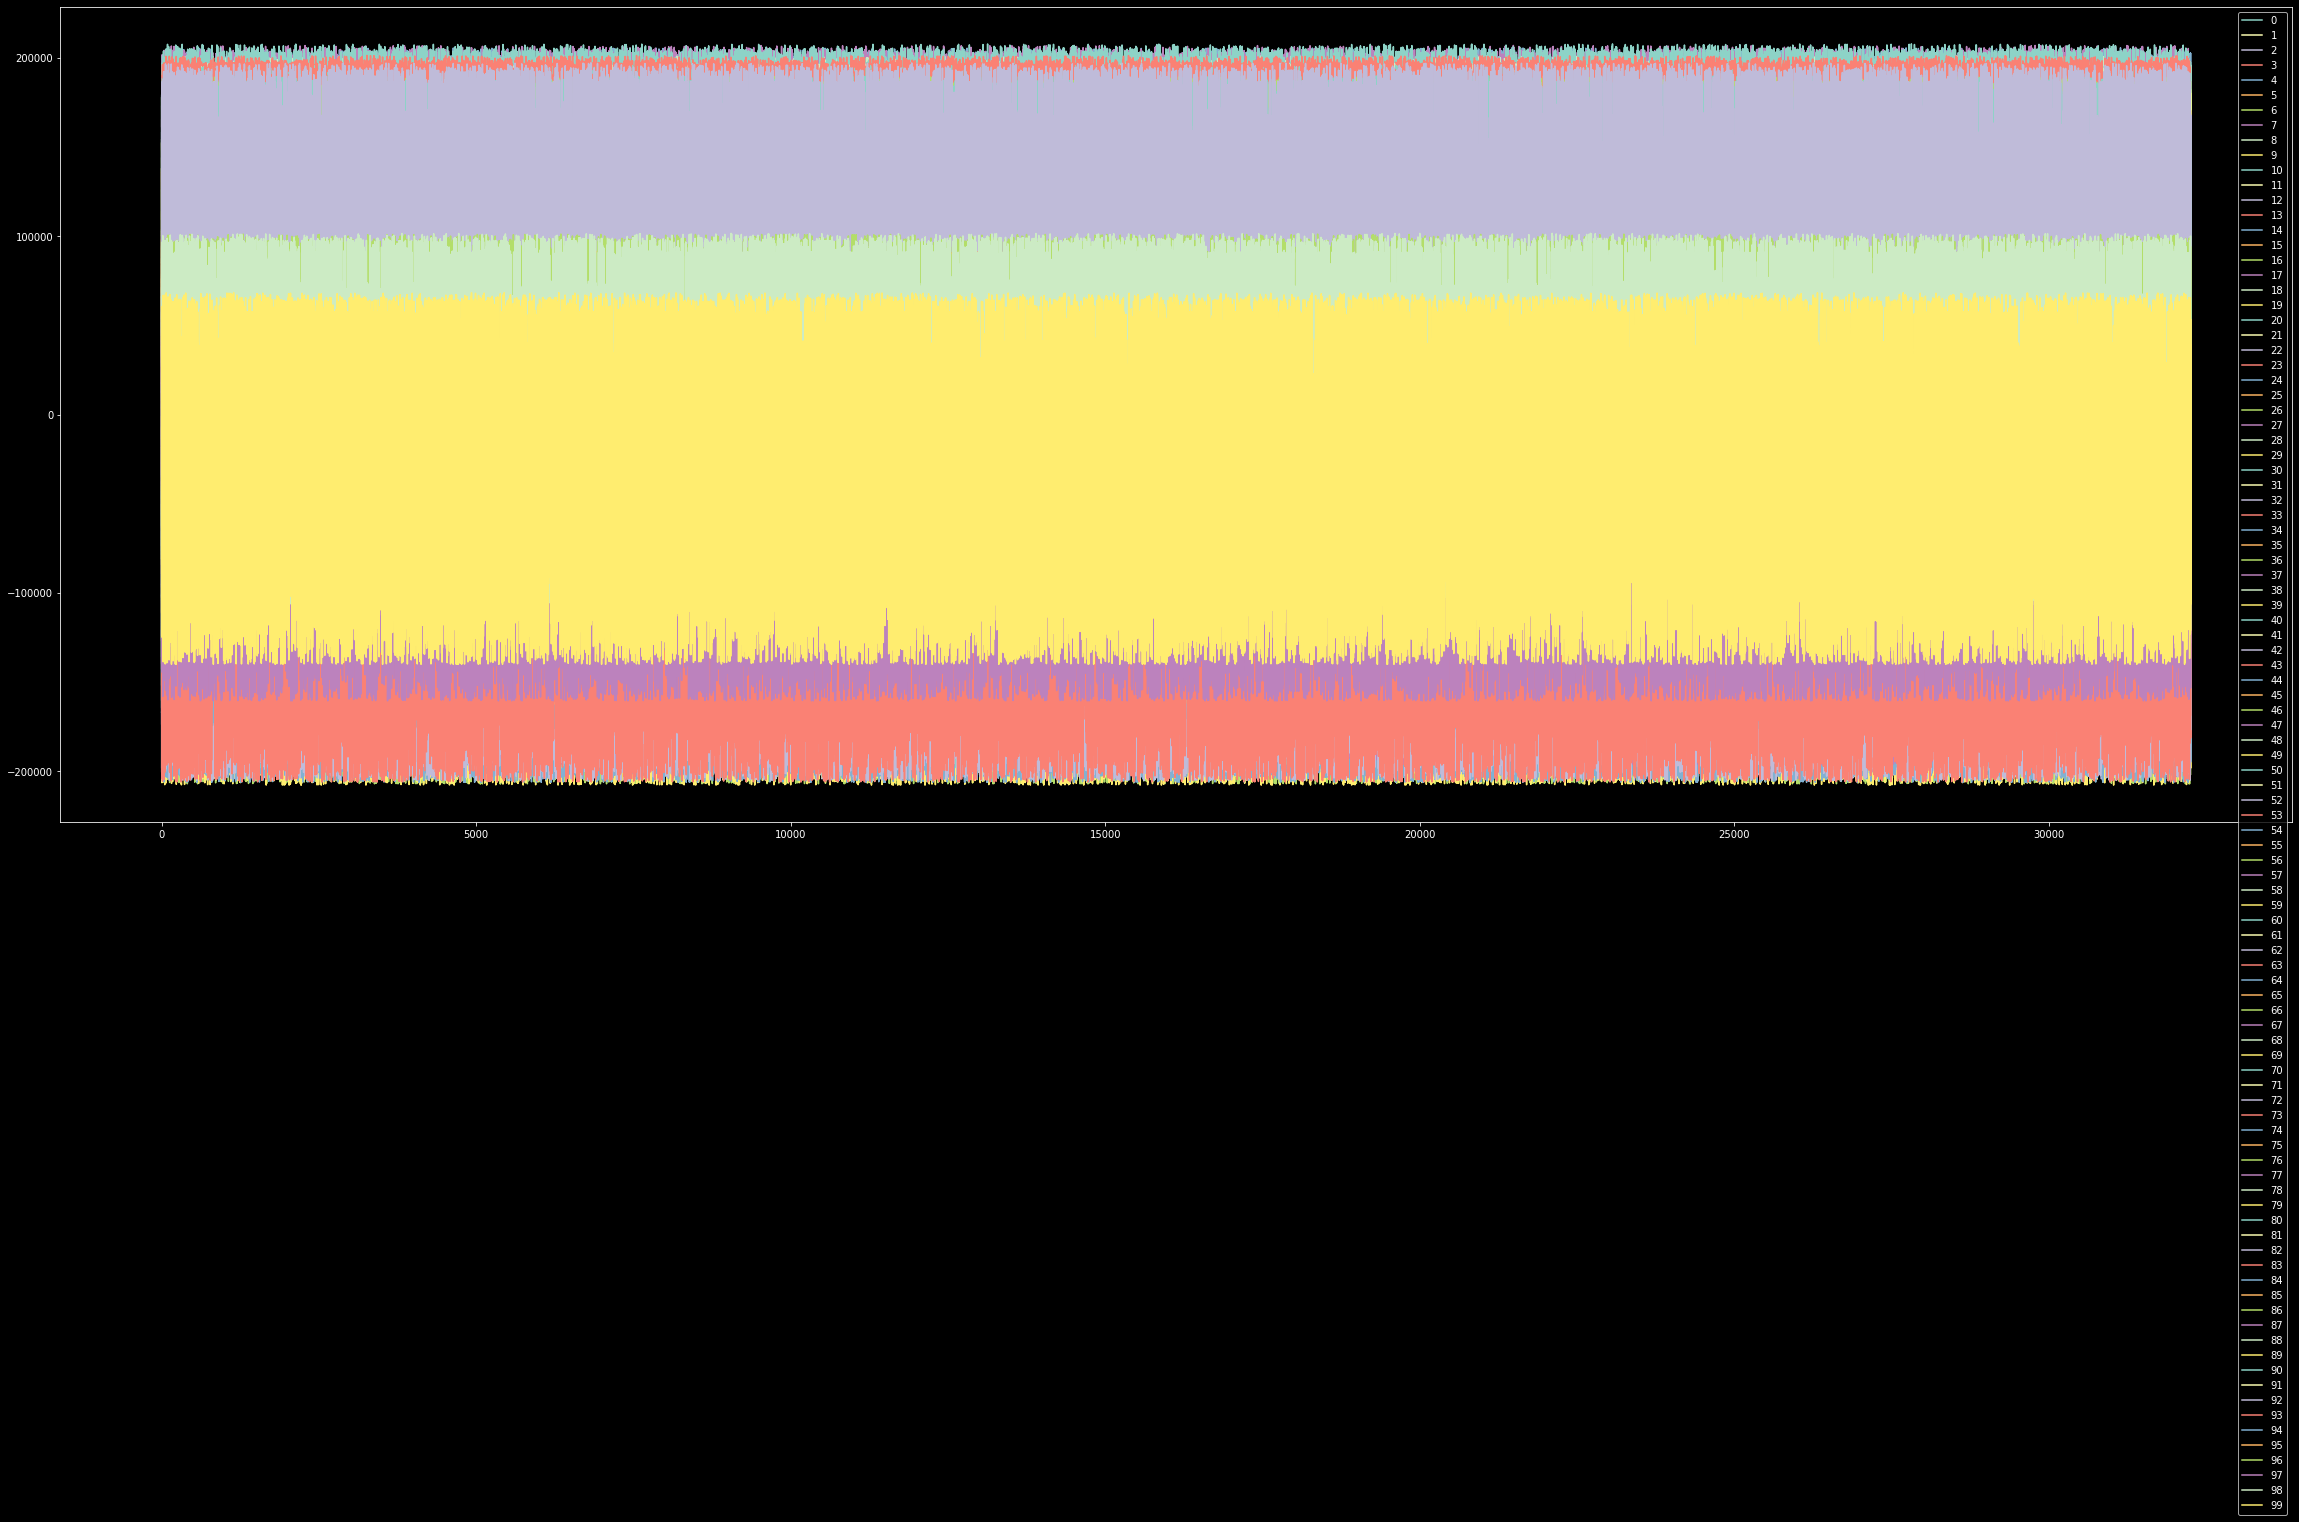

In [46]:
monte_carlo.plot()